Original Code can be found here : https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb

### Edited and Translated to Pyton 3.11.6 By:
### Name: Marcel Zama
### Student ID: C00260146
### Date: 27/11/2023

In [1]:
# Import necessary library
import matplotlib.pyplot as plt

# Display available Matplotlib plot styles
print(plt.style.available)  # Print the list of available styles

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
# Enable inline plotting for Jupyter Notebooks
%matplotlib inline

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Set the plot style to 'seaborn-v0_8-whitegrid'
plt.style.use('seaborn-v0_8-whitegrid')

# Now you can create and display your plots using Matplotlib
# For example, you can use the plt.scatter function to create a scatter plot
# or other plotting functions as needed for your data visualization.

In [3]:
# Install scikit-learn library using pip
# If you're running this code in a Jupyter Notebook, use !pip
# If you're running it in a script or terminal, use pip directly

!pip install scikit-learn

# Creating a Decision Tree
Consider the following two-dimensional data, which has one of four class labels (see the following figure):

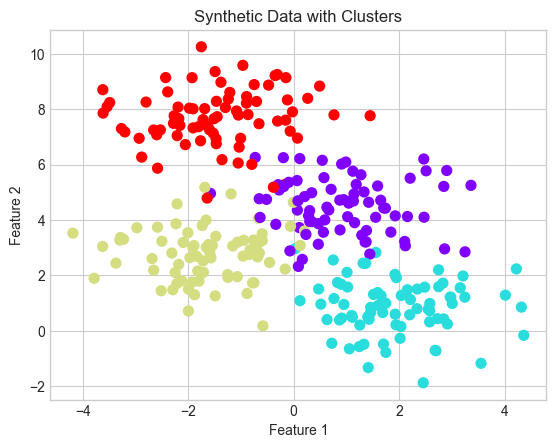

In [4]:
# Import necessary libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data with 4 clusters using make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

# Plot the generated data using matplotlib
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

# Customize the plot
plt.title('Synthetic Data with Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

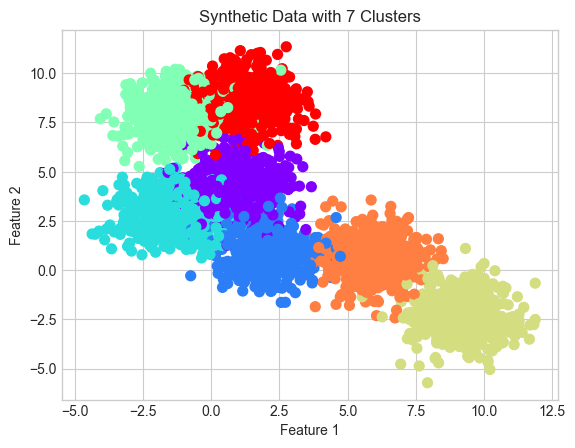

In [5]:
# Import necessary libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data with 7 clusters using make_blobs
X, y = make_blobs(n_samples=3000, centers=7, random_state=0, cluster_std=1.0)

# Plot the generated data using matplotlib
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

# Customize the plot
plt.title('Synthetic Data with 7 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [6]:
# Import necessary library
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier and fit it to the data
tree = DecisionTreeClassifier().fit(X, y)

In [7]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    # If an axis is not provided, use the current axis
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    
    # Adjust axis settings
    ax.axis('tight')
    ax.axis('off')
    
    # Get current axis limits
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Fit the estimator (model) to the training data
    model.fit(X, y)
    
    # Create a meshgrid for visualization
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    
    # Predict labels for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results (decision boundaries)
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    # Set the axis limits based on the original limits
    ax.set(xlim=xlim, ylim=ylim)


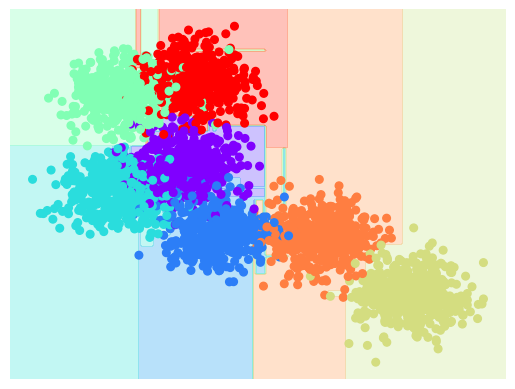

In [8]:
# Call the visualize_classifier function with the DecisionTreeClassifier model, input data X, and labels y
visualize_classifier(DecisionTreeClassifier(), X, y)

# Decision Trees and Overfitting

In [9]:
# helpers_05_08 is found in the online appendix
import helpers_05_08
# Call the plot_tree_interactive function with the input data X and labels y
helpers_05_08.plot_tree_interactive(X, y)

interactive(children=(IntSlider(value=5, description='depth', max=5, min=1), Output()), _dom_classes=('widget-…

<function helpers_05_08.plot_tree_interactive.<locals>.interactive_tree(depth=5)>

In [10]:
# helpers_05_08 is found in the online appendix
import helpers_05_08
# Call the randomized_tree_interactive function with the input data X and labels y
helpers_05_08.randomized_tree_interactive(X, y)

interactive(children=(IntSlider(value=0, description='random_state'), Output()), _dom_classes=('widget-interac…

# Ensembles of Estimators: Random Forests

C:\Users\Ben\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Ben\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


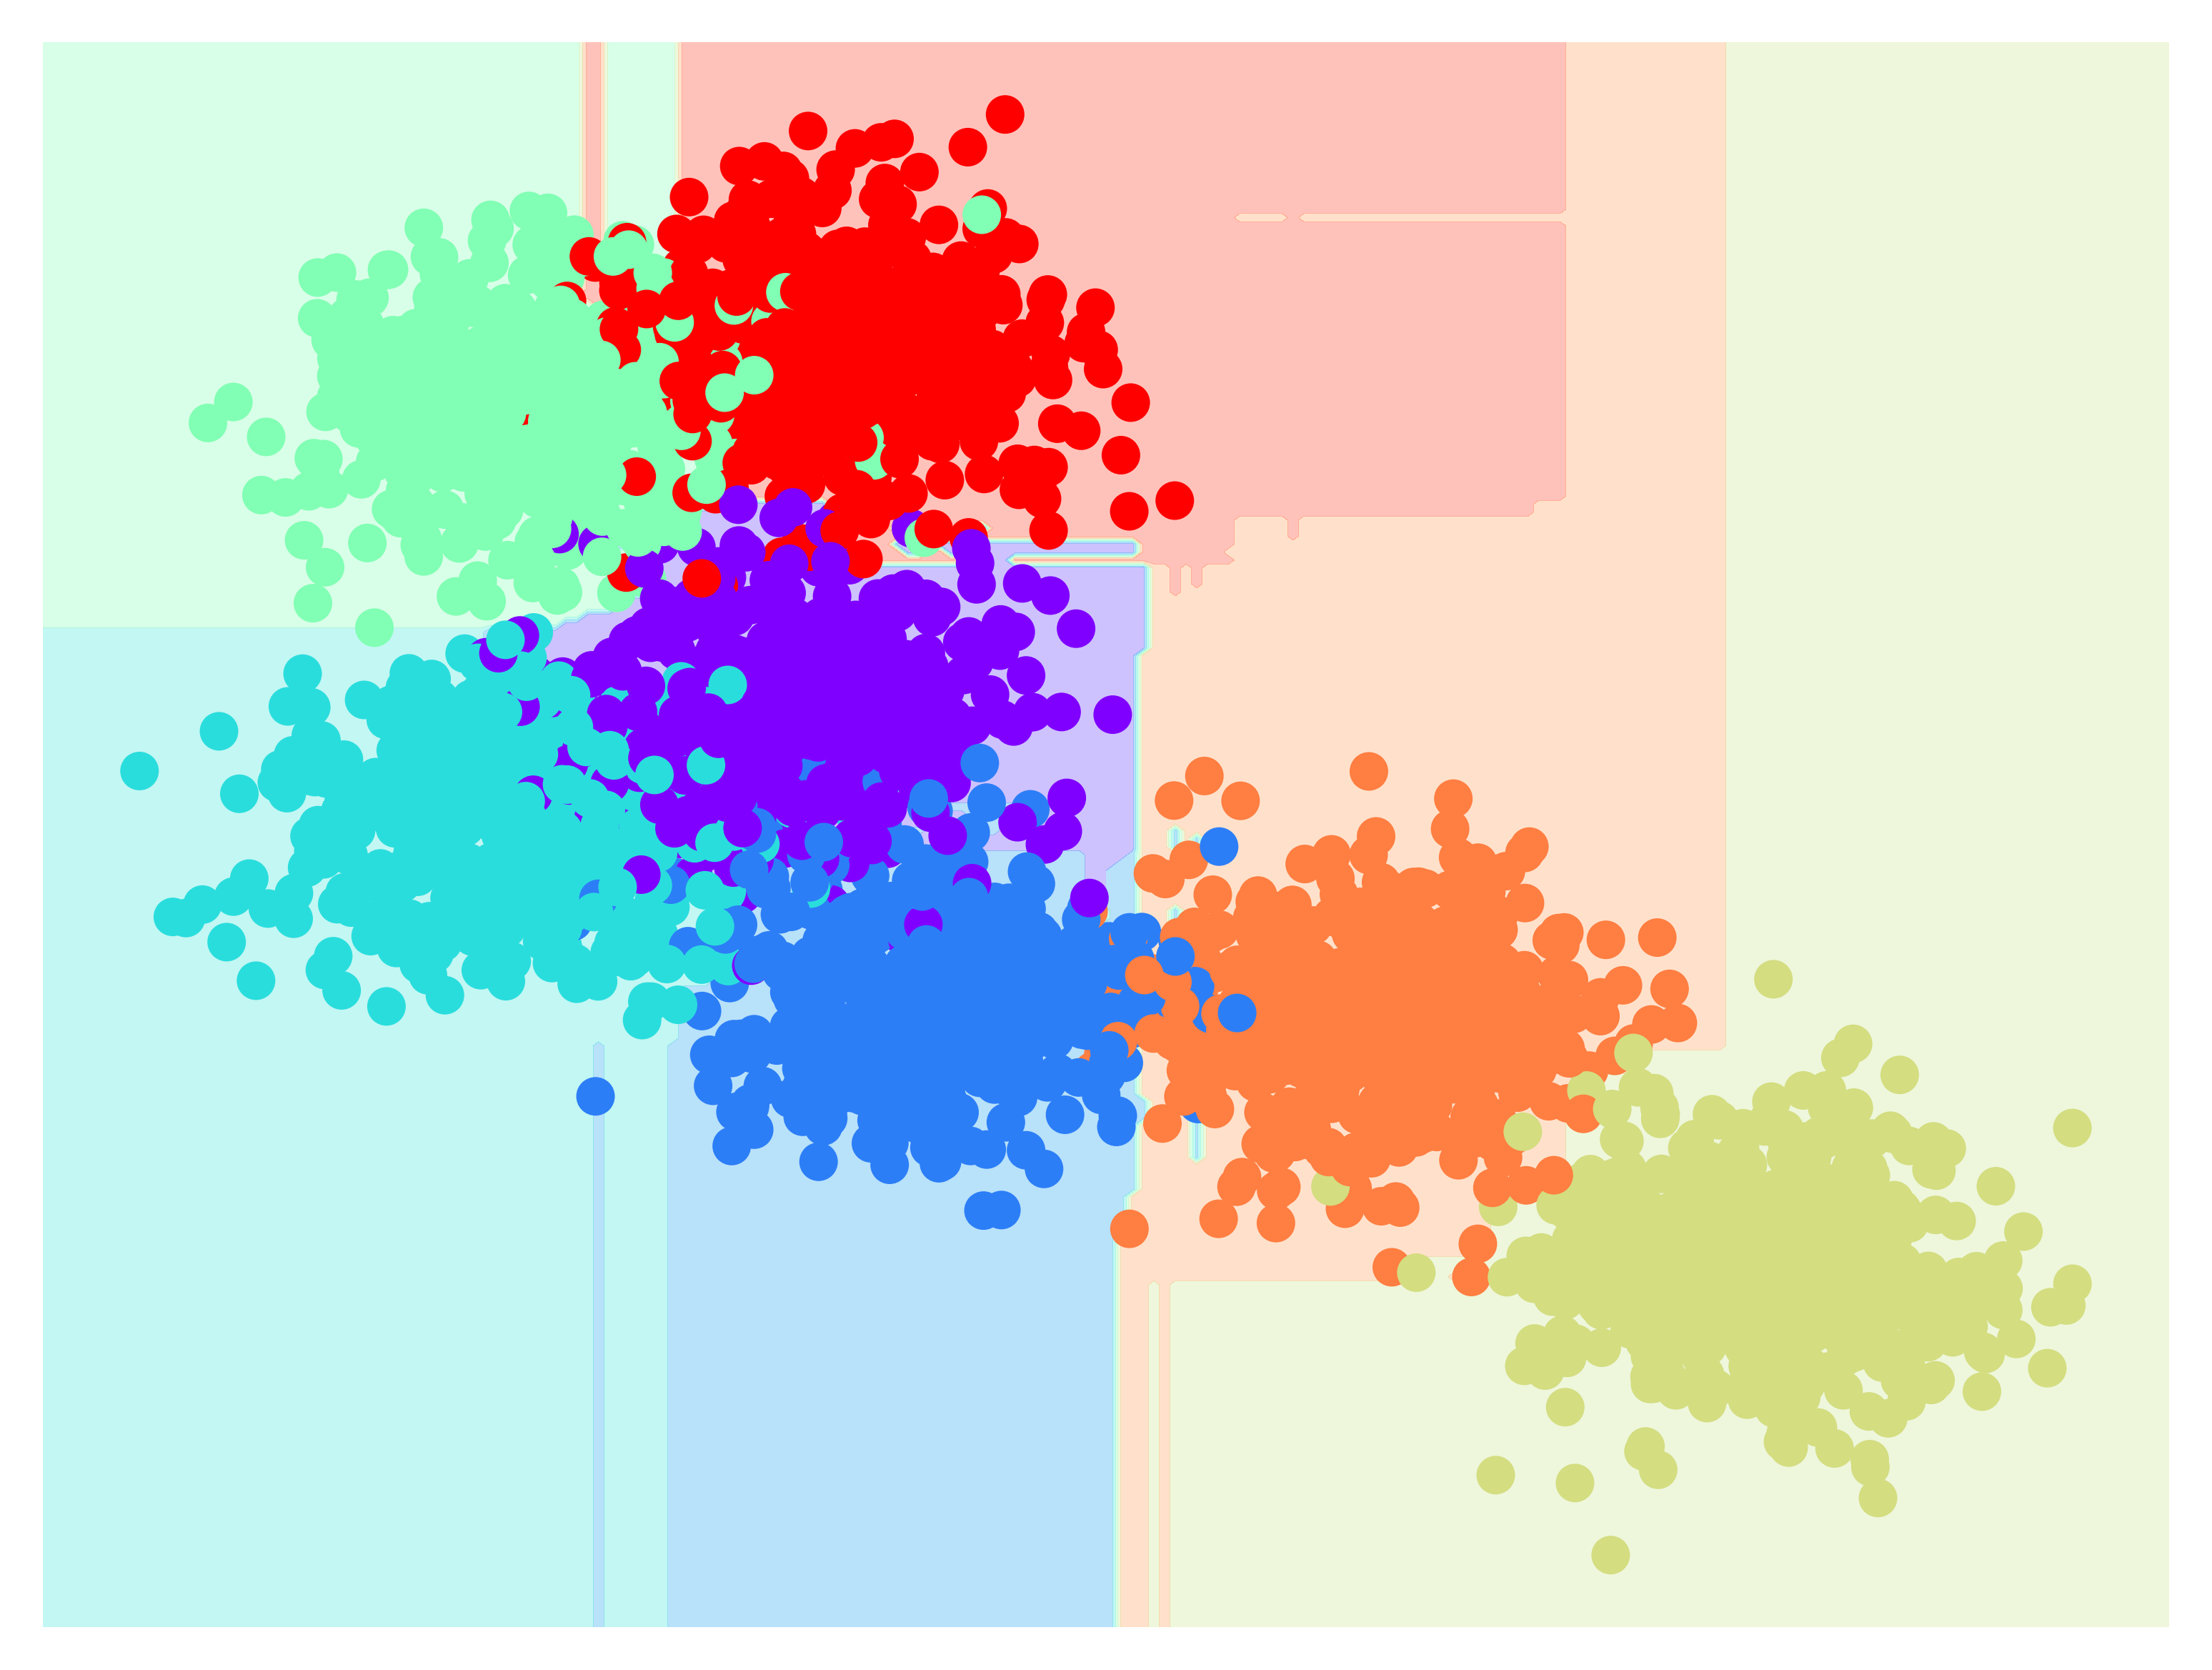

In [11]:
# Import necessary modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Create a Decision Tree Classifier
tree = DecisionTreeClassifier()

# Create a Bagging Classifier with 100 base estimators, using 80% of samples for each estimator
bag = BaggingClassifier(base_estimator=tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

# Fit the Bagging Classifier on the data (assuming X, y are defined earlier)
bag.fit(X, y)

# Visualize the Bagging Classifier
visualize_classifier(bag, X, y)

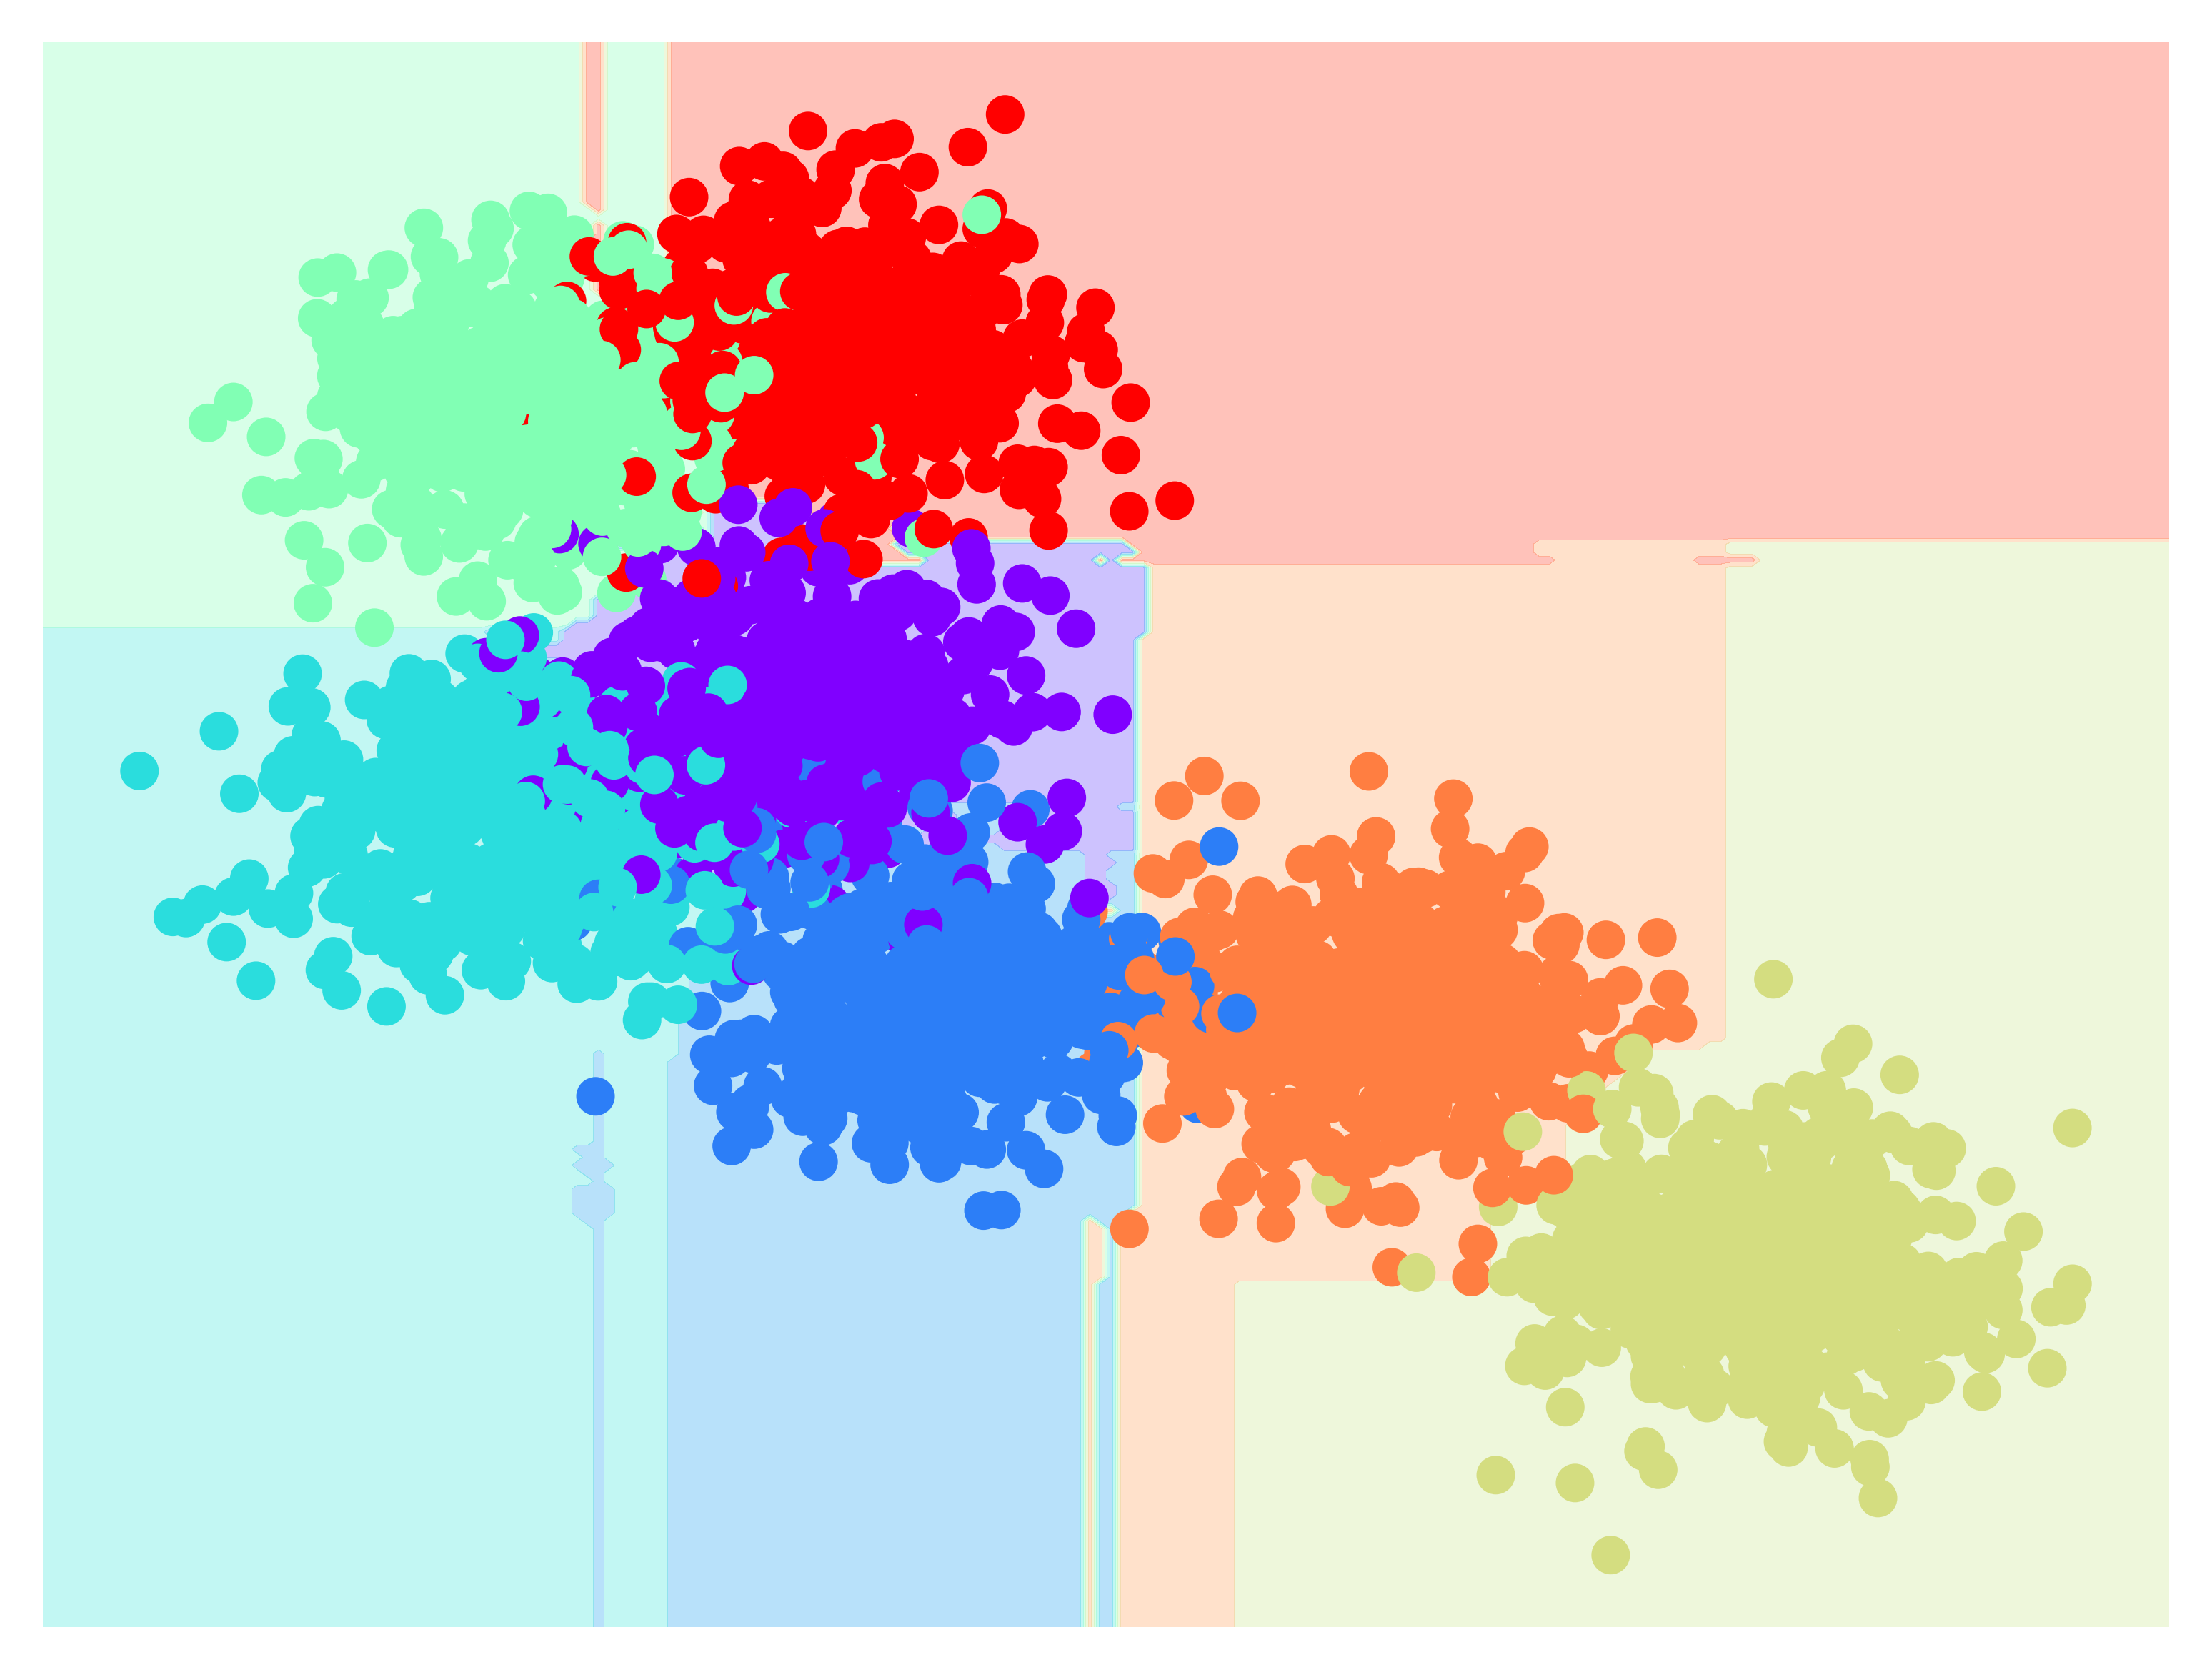

In [12]:
# Import necessary modules
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier with 100 trees
model = RandomForestClassifier(n_estimators=100, random_state=0)

# Visualize the RandomForestClassifier
visualize_classifier(model, X, y)

# Random Forest Regression

Consider the following data, drawn from the combination of a fast and slow oscillation (see the following figure):

<ErrorbarContainer object of 3 artists>

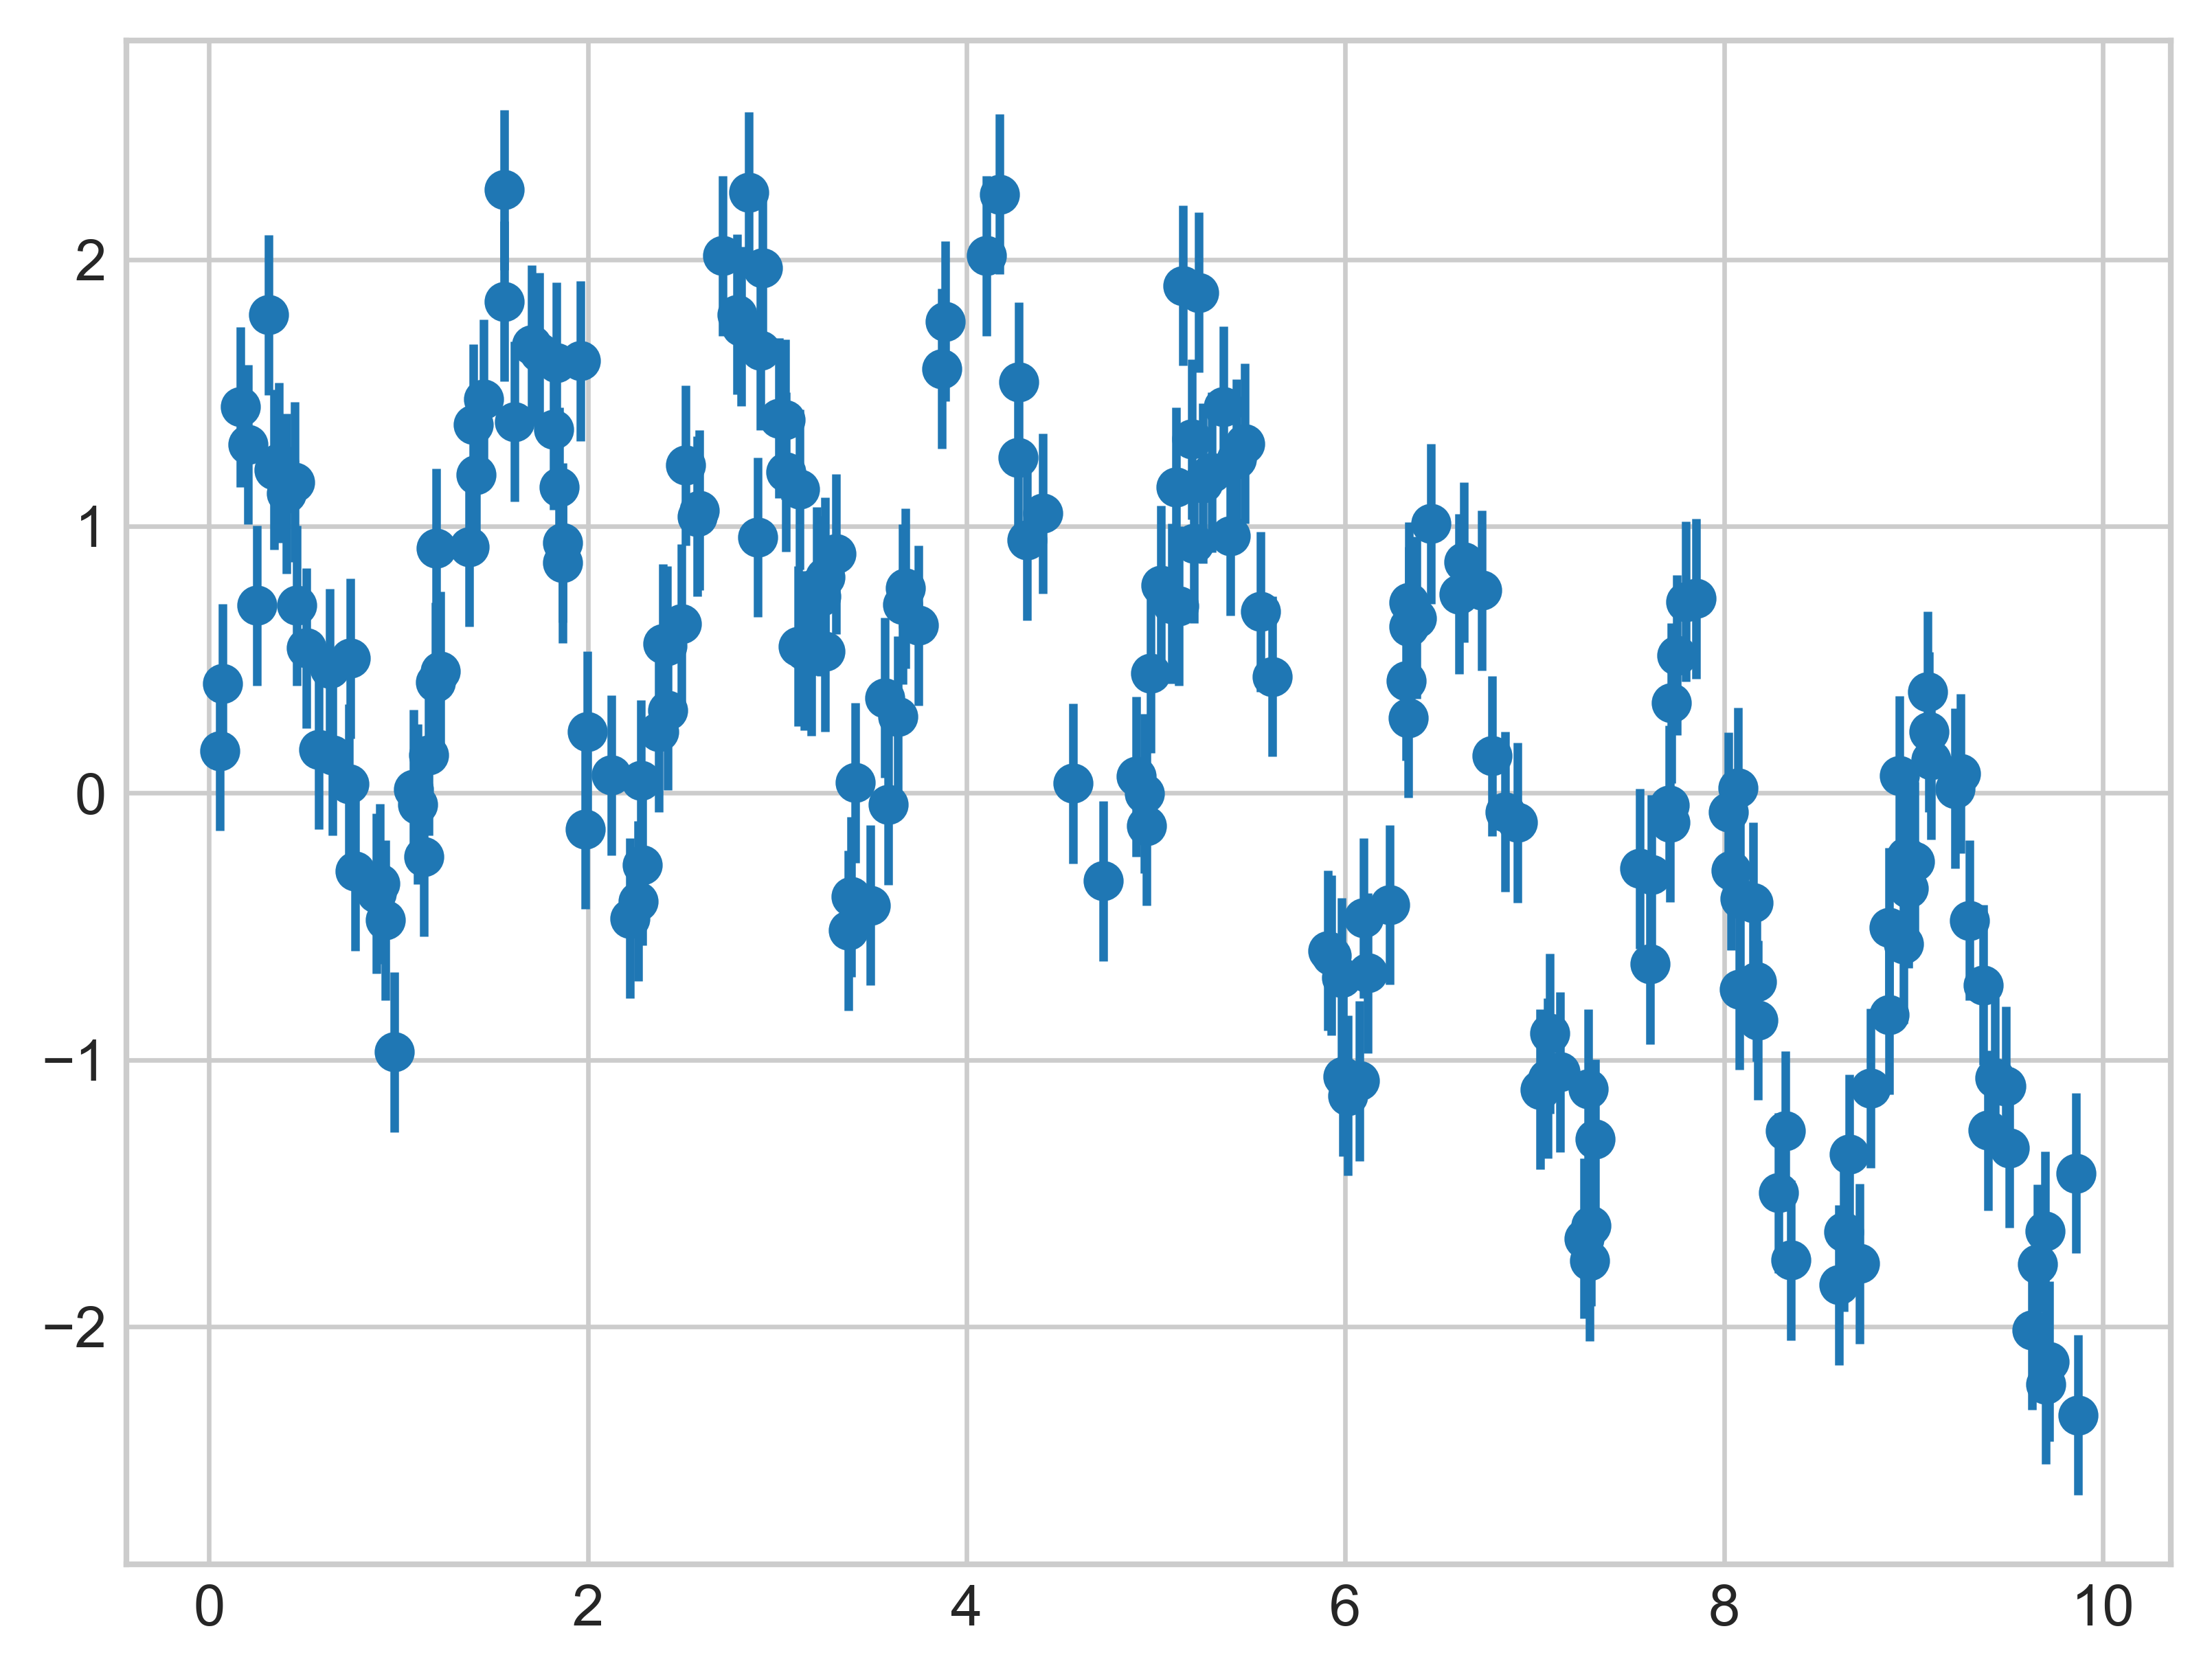

In [13]:
# Set random seed for reproducibility
rng = np.random.RandomState(42)

# Generate random data
x = 10 * rng.rand(200)

# Define a model function with oscillations and noise
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

# Generate y values using the model
y = model(x)

# Plot the data points with error bars
plt.errorbar(x, y, 0.3, fmt='o')

Using the random forest regressor, we can find the best-fit curve as follows (see the following figure):

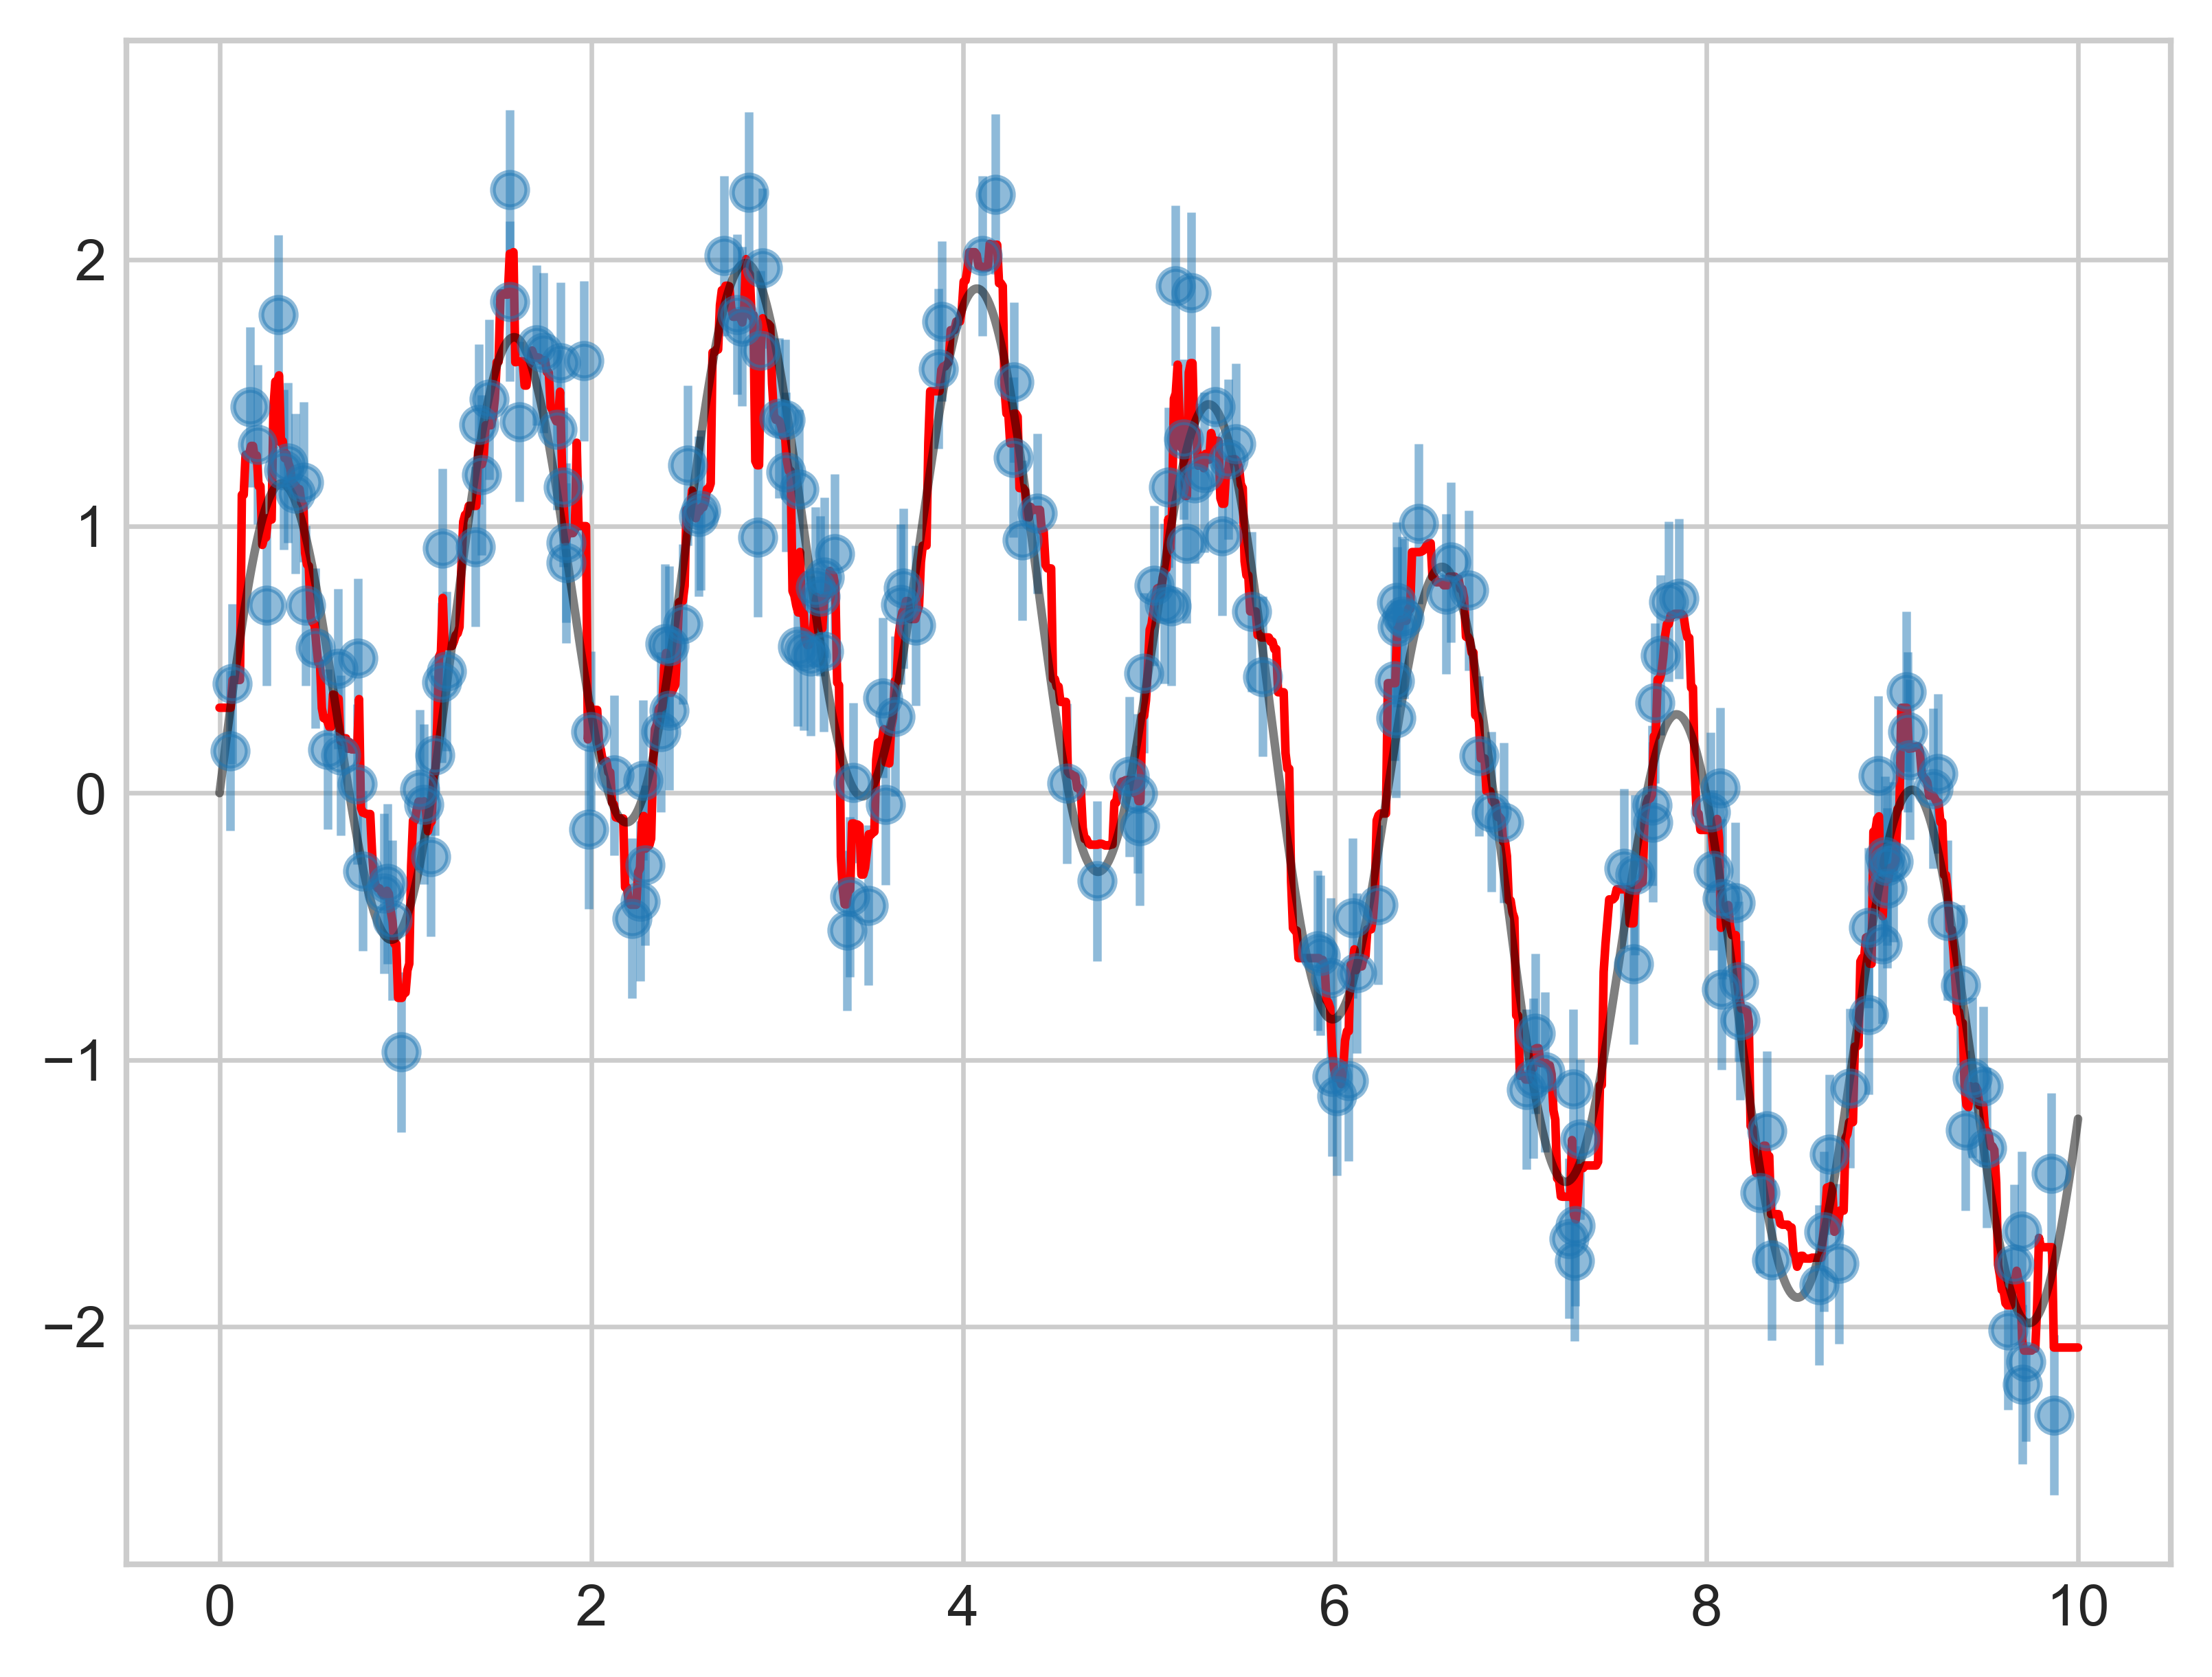

In [14]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor with 200 trees
forest = RandomForestRegressor(n_estimators=200)

# Fit the model to the data
forest.fit(x[:, None], y)

# Generate x values for prediction
xfit = np.linspace(0, 10, 1000)

# Predict y values using the trained model
yfit = forest.predict(xfit[:, None])

# Generate true y values using the model function
ytrue = model(xfit, sigma=0)

# Plot the data points with error bars, predicted values, and true values
plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5, label='Data')
plt.plot(xfit, yfit, '-r', label='Random Forest Prediction')
plt.plot(xfit, ytrue, '-k', alpha=0.5, label='True Model')

In [15]:
# Import necessary library
import matplotlib.pyplot as plt

# Display available Matplotlib plot styles
print(plt.style.available)  # Print the list of available styles

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [16]:
# Enable inline plotting for Jupyter Notebooks
%matplotlib inline

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Set the plot style to 'seaborn-v0_8-whitegrid'
plt.style.use('seaborn-v0_8-whitegrid')

# Now you can create and display your plots using Matplotlib
# For example, you can use the plt.scatter function to create a scatter plot
# or other plotting functions as needed for your data visualization.

In [17]:
# Install scikit-learn library using pip
# If you're running this code in a Jupyter Notebook, use !pip
# If you're running it in a script or terminal, use pip directly

!pip install scikit-learn

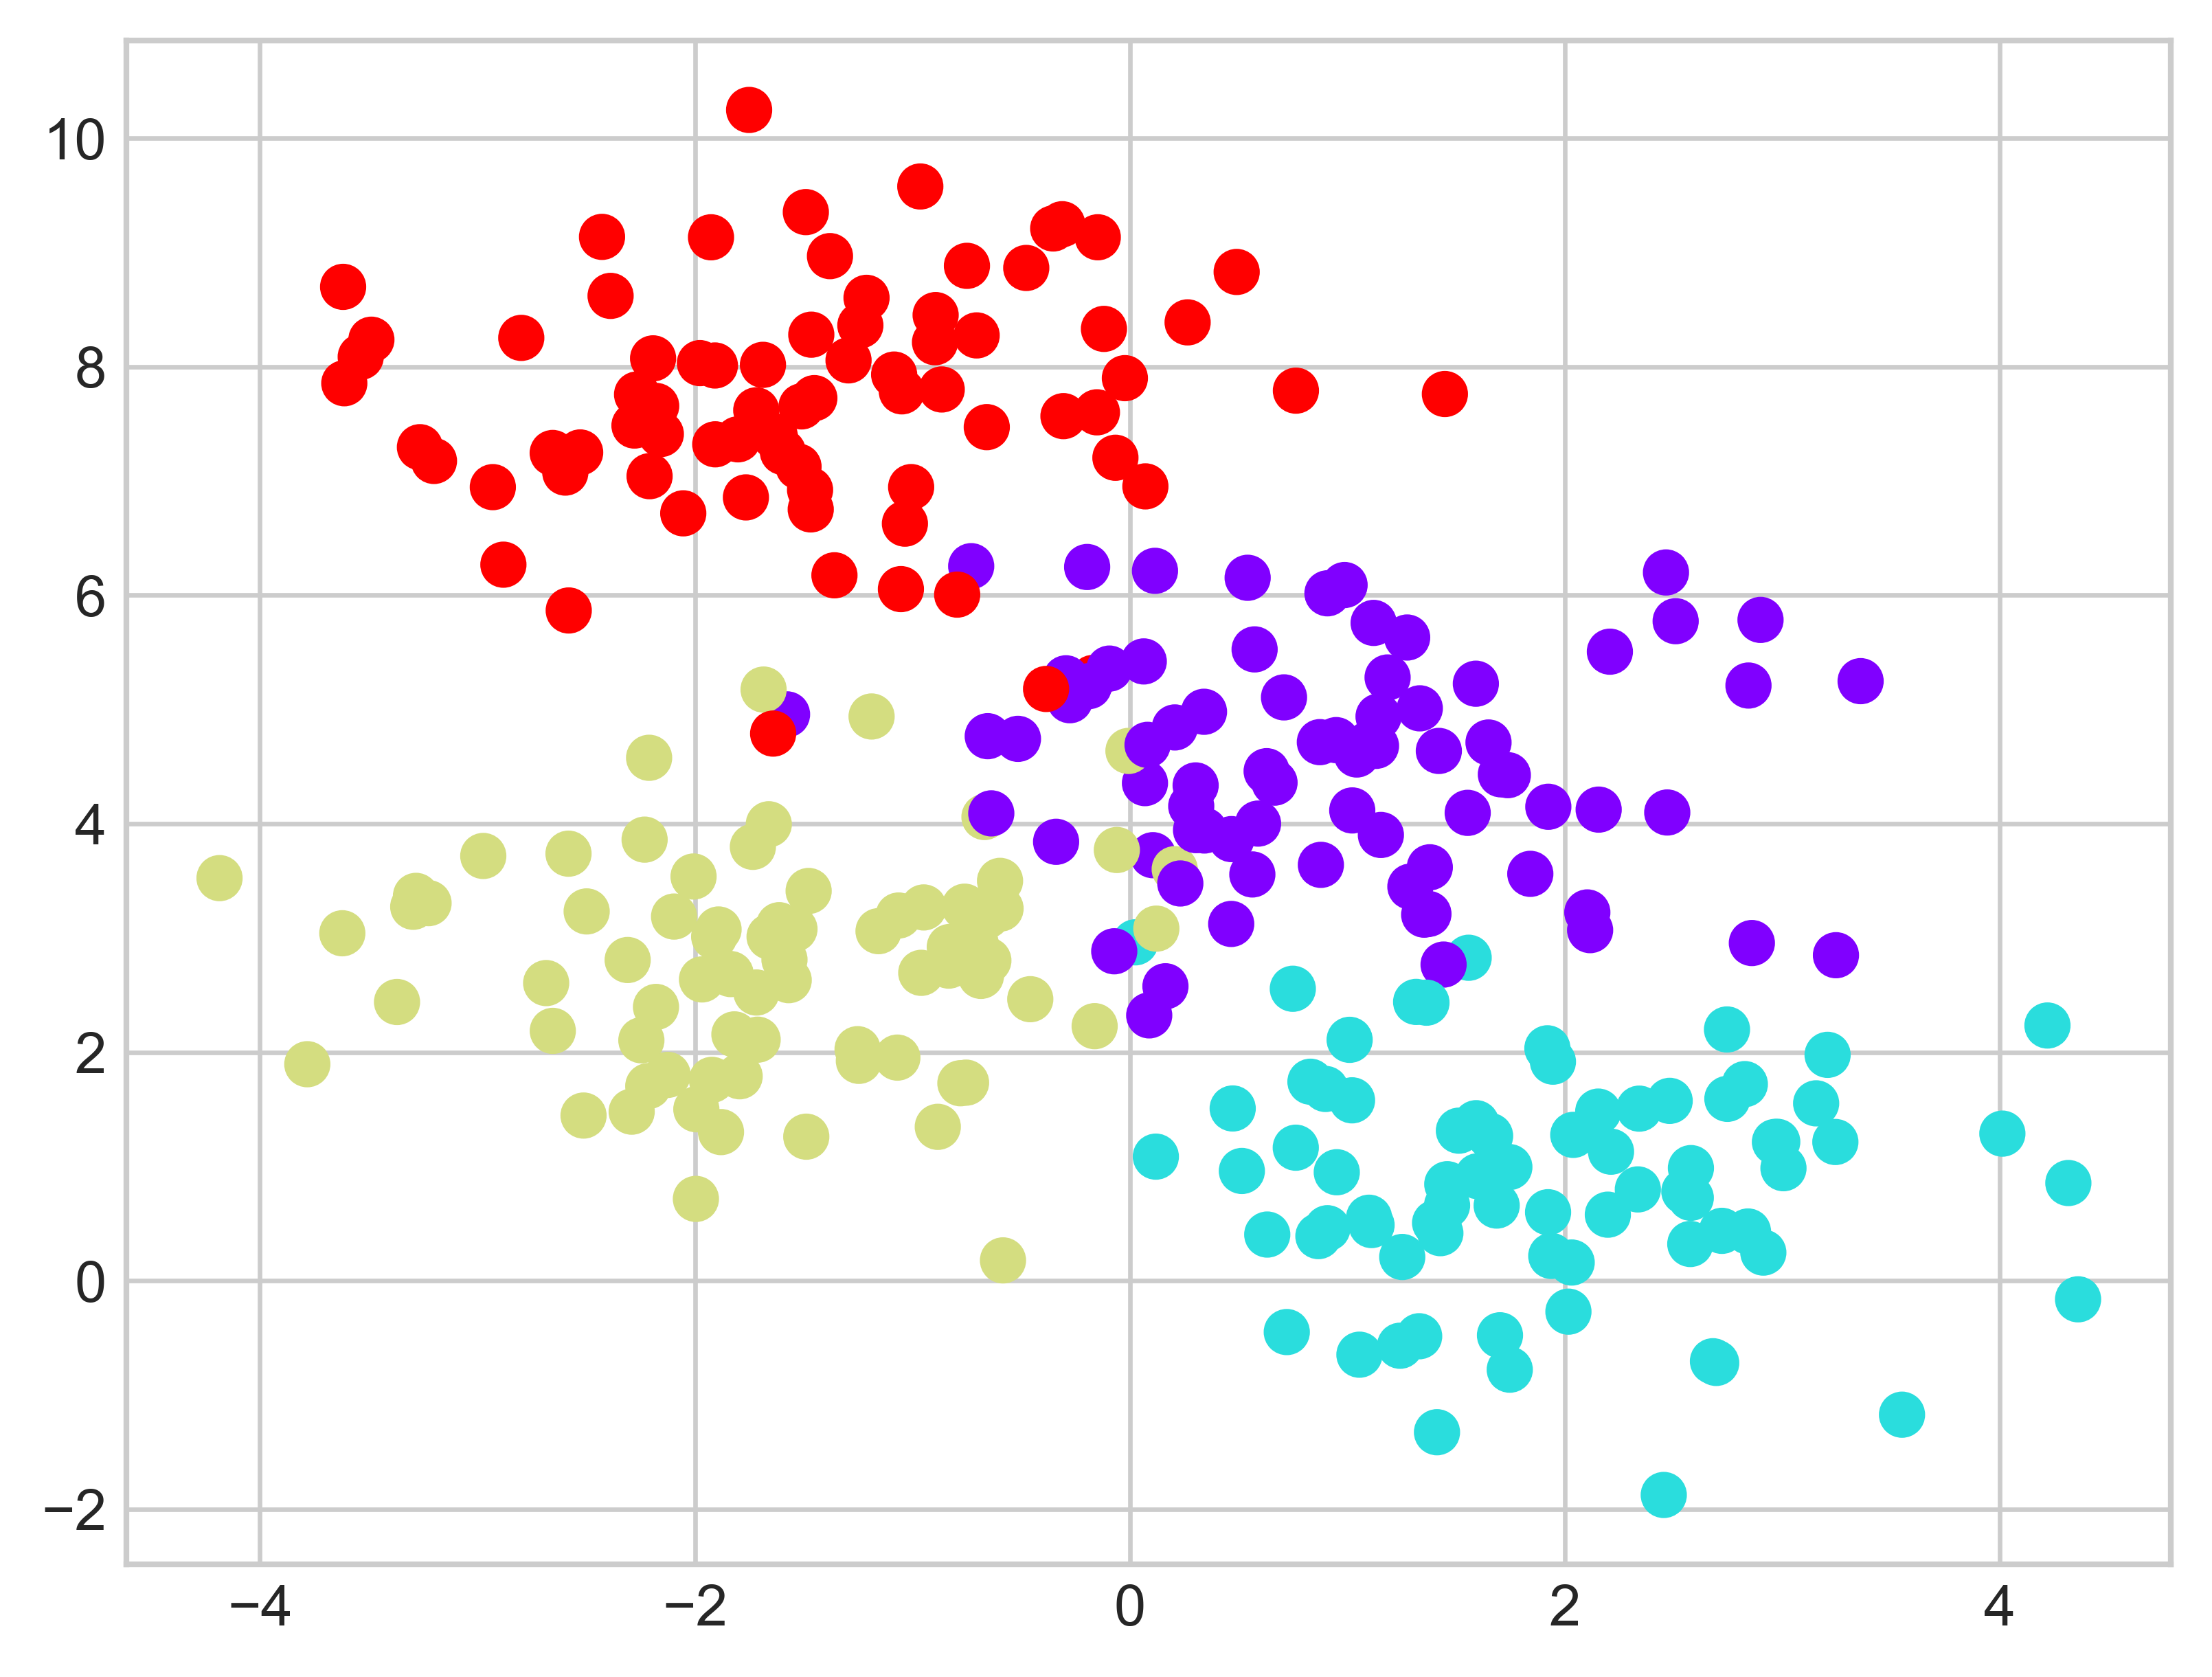

In [18]:
# Import necessary libraries
from sklearn.datasets import make_blobs

# Generate synthetic data with 4 clusters
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

# Scatter plot of the generated data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

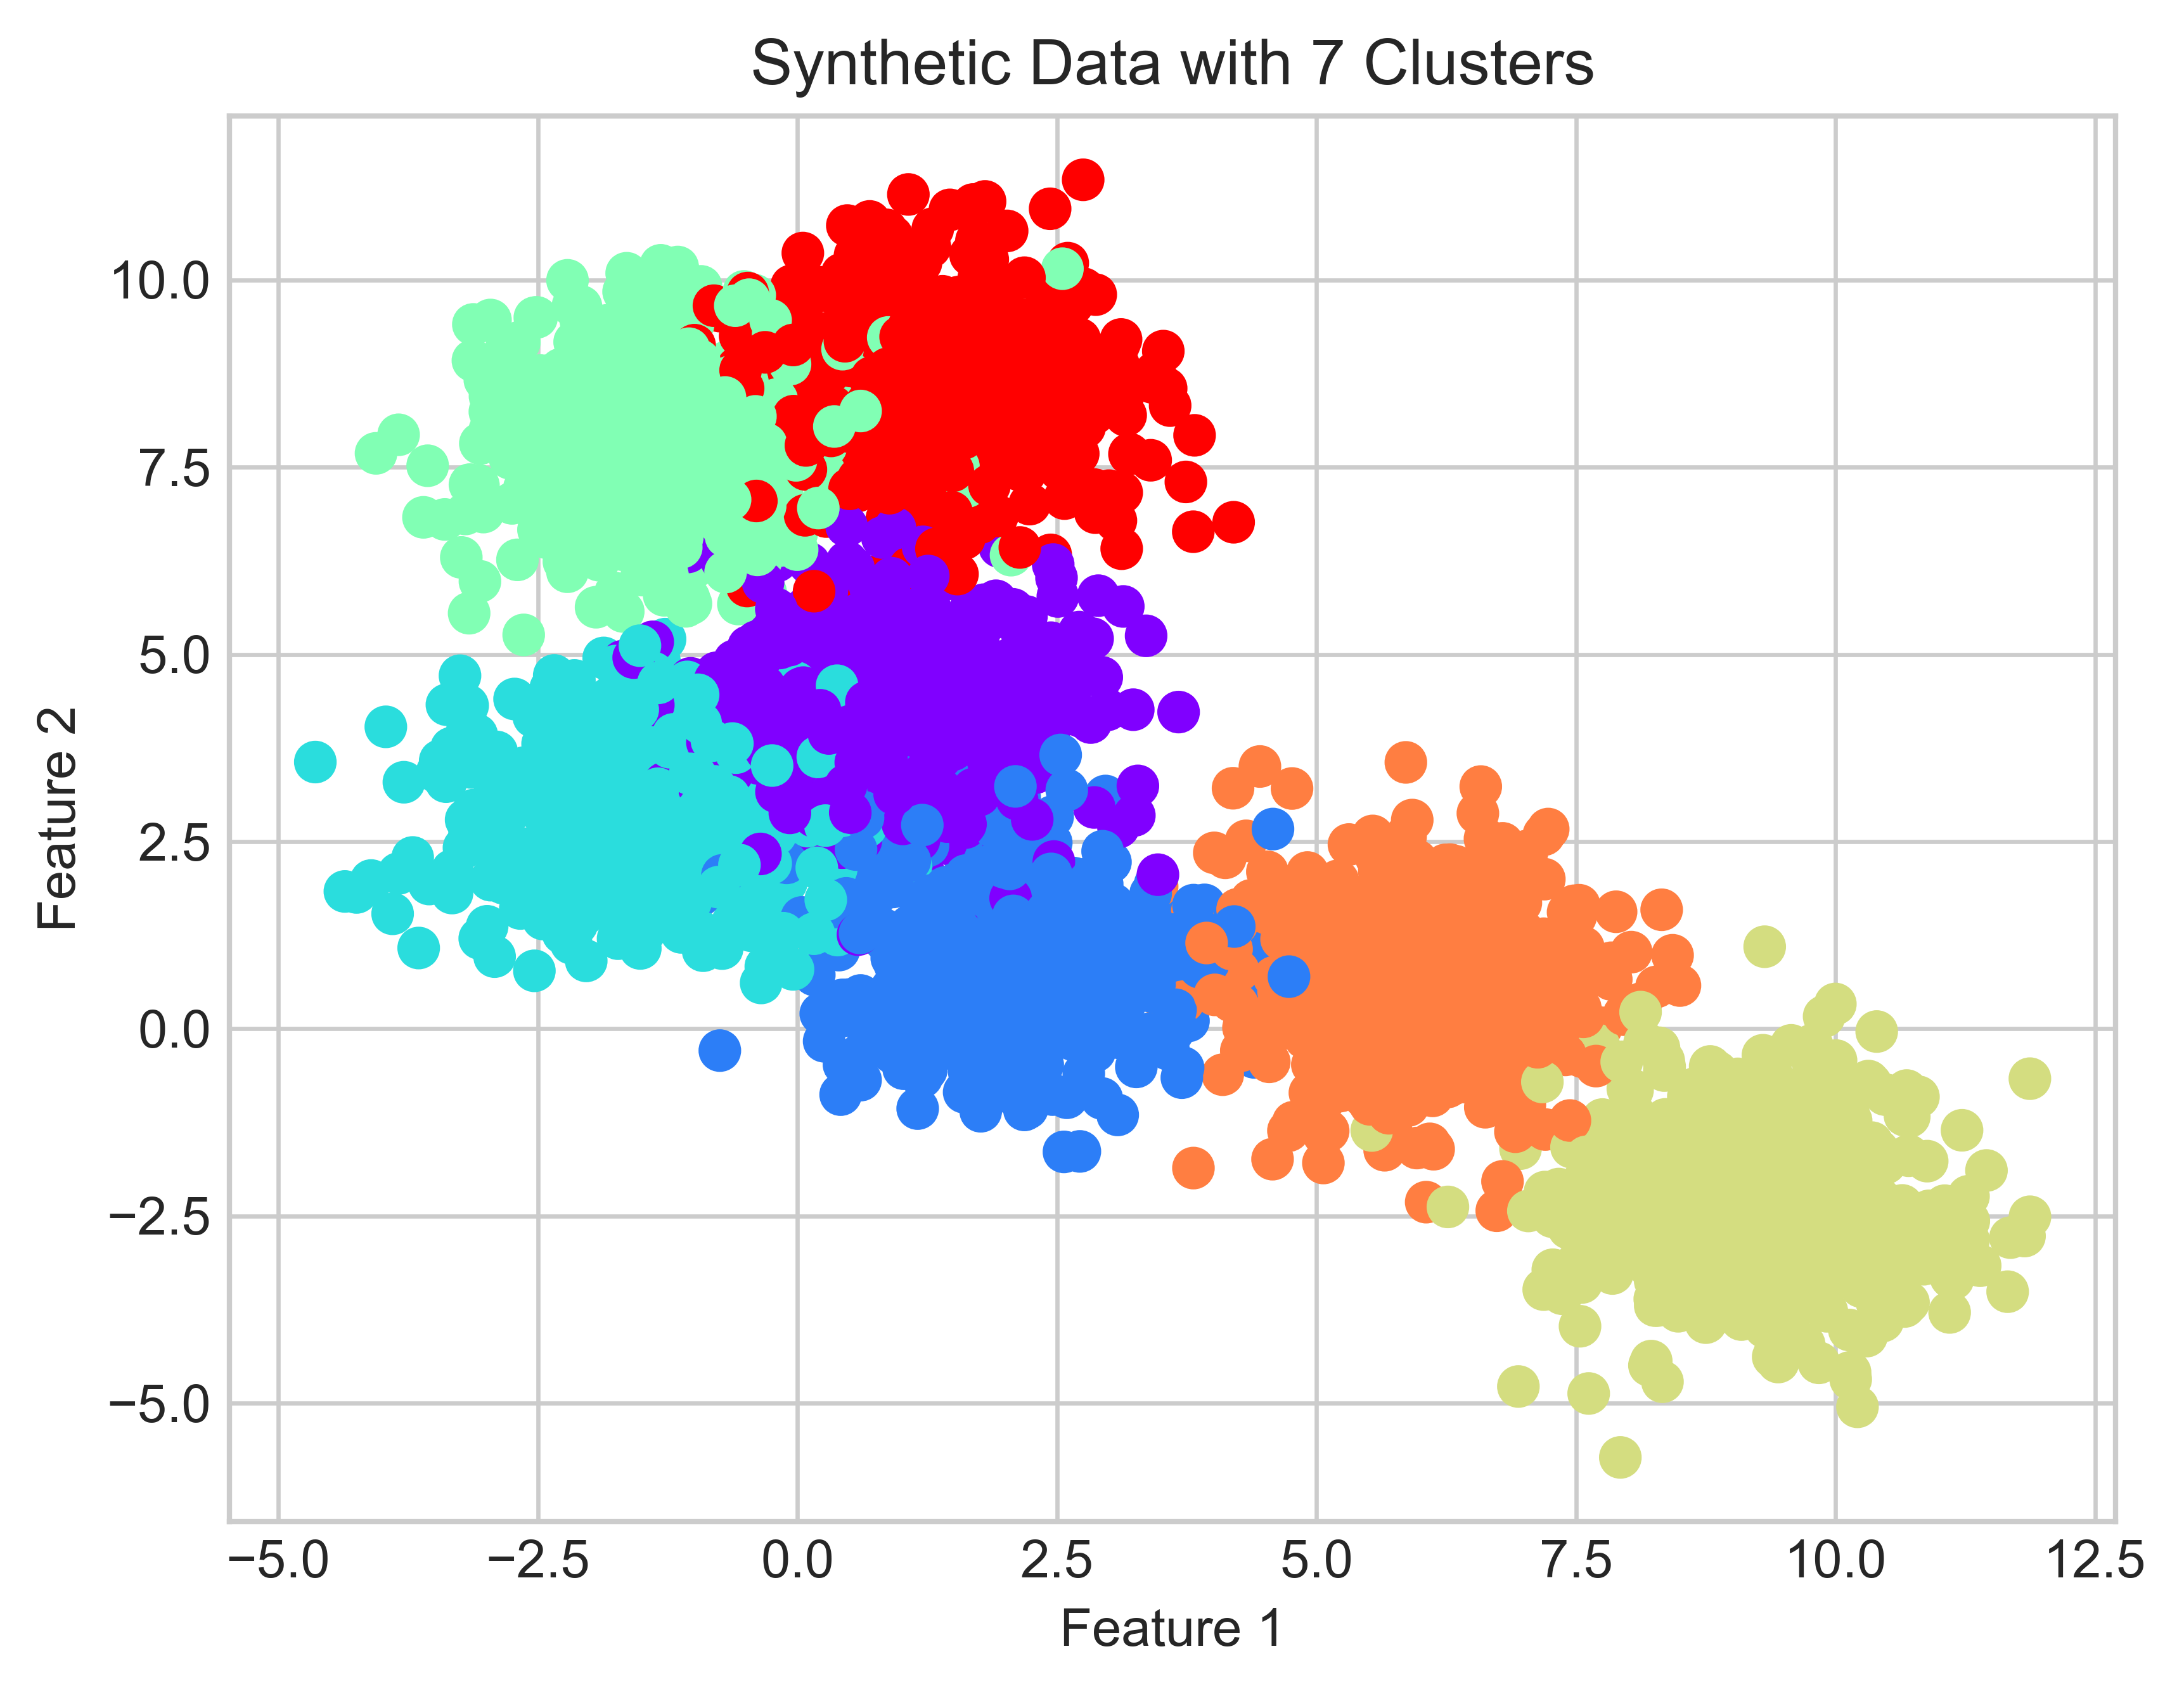

In [19]:
# Import necessary libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data with 7 clusters using make_blobs
X, y = make_blobs(n_samples=3000, centers=7, random_state=0, cluster_std=1.0)

# Plot the generated data using matplotlib
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

# Customize the plot
plt.title('Synthetic Data with 7 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [20]:
# Import necessary library
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier and fit it to the data
tree = DecisionTreeClassifier().fit(X, y)

In [21]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    # If an axis is not provided, use the current axis
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    
    # Adjust axis settings
    ax.axis('tight')
    ax.axis('off')
    
    # Get current axis limits
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Fit the estimator (model) to the training data
    model.fit(X, y)
    
    # Create a meshgrid for visualization
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    
    # Predict labels for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results (decision boundaries)
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    # Set the axis limits based on the original limits
    ax.set(xlim=xlim, ylim=ylim)


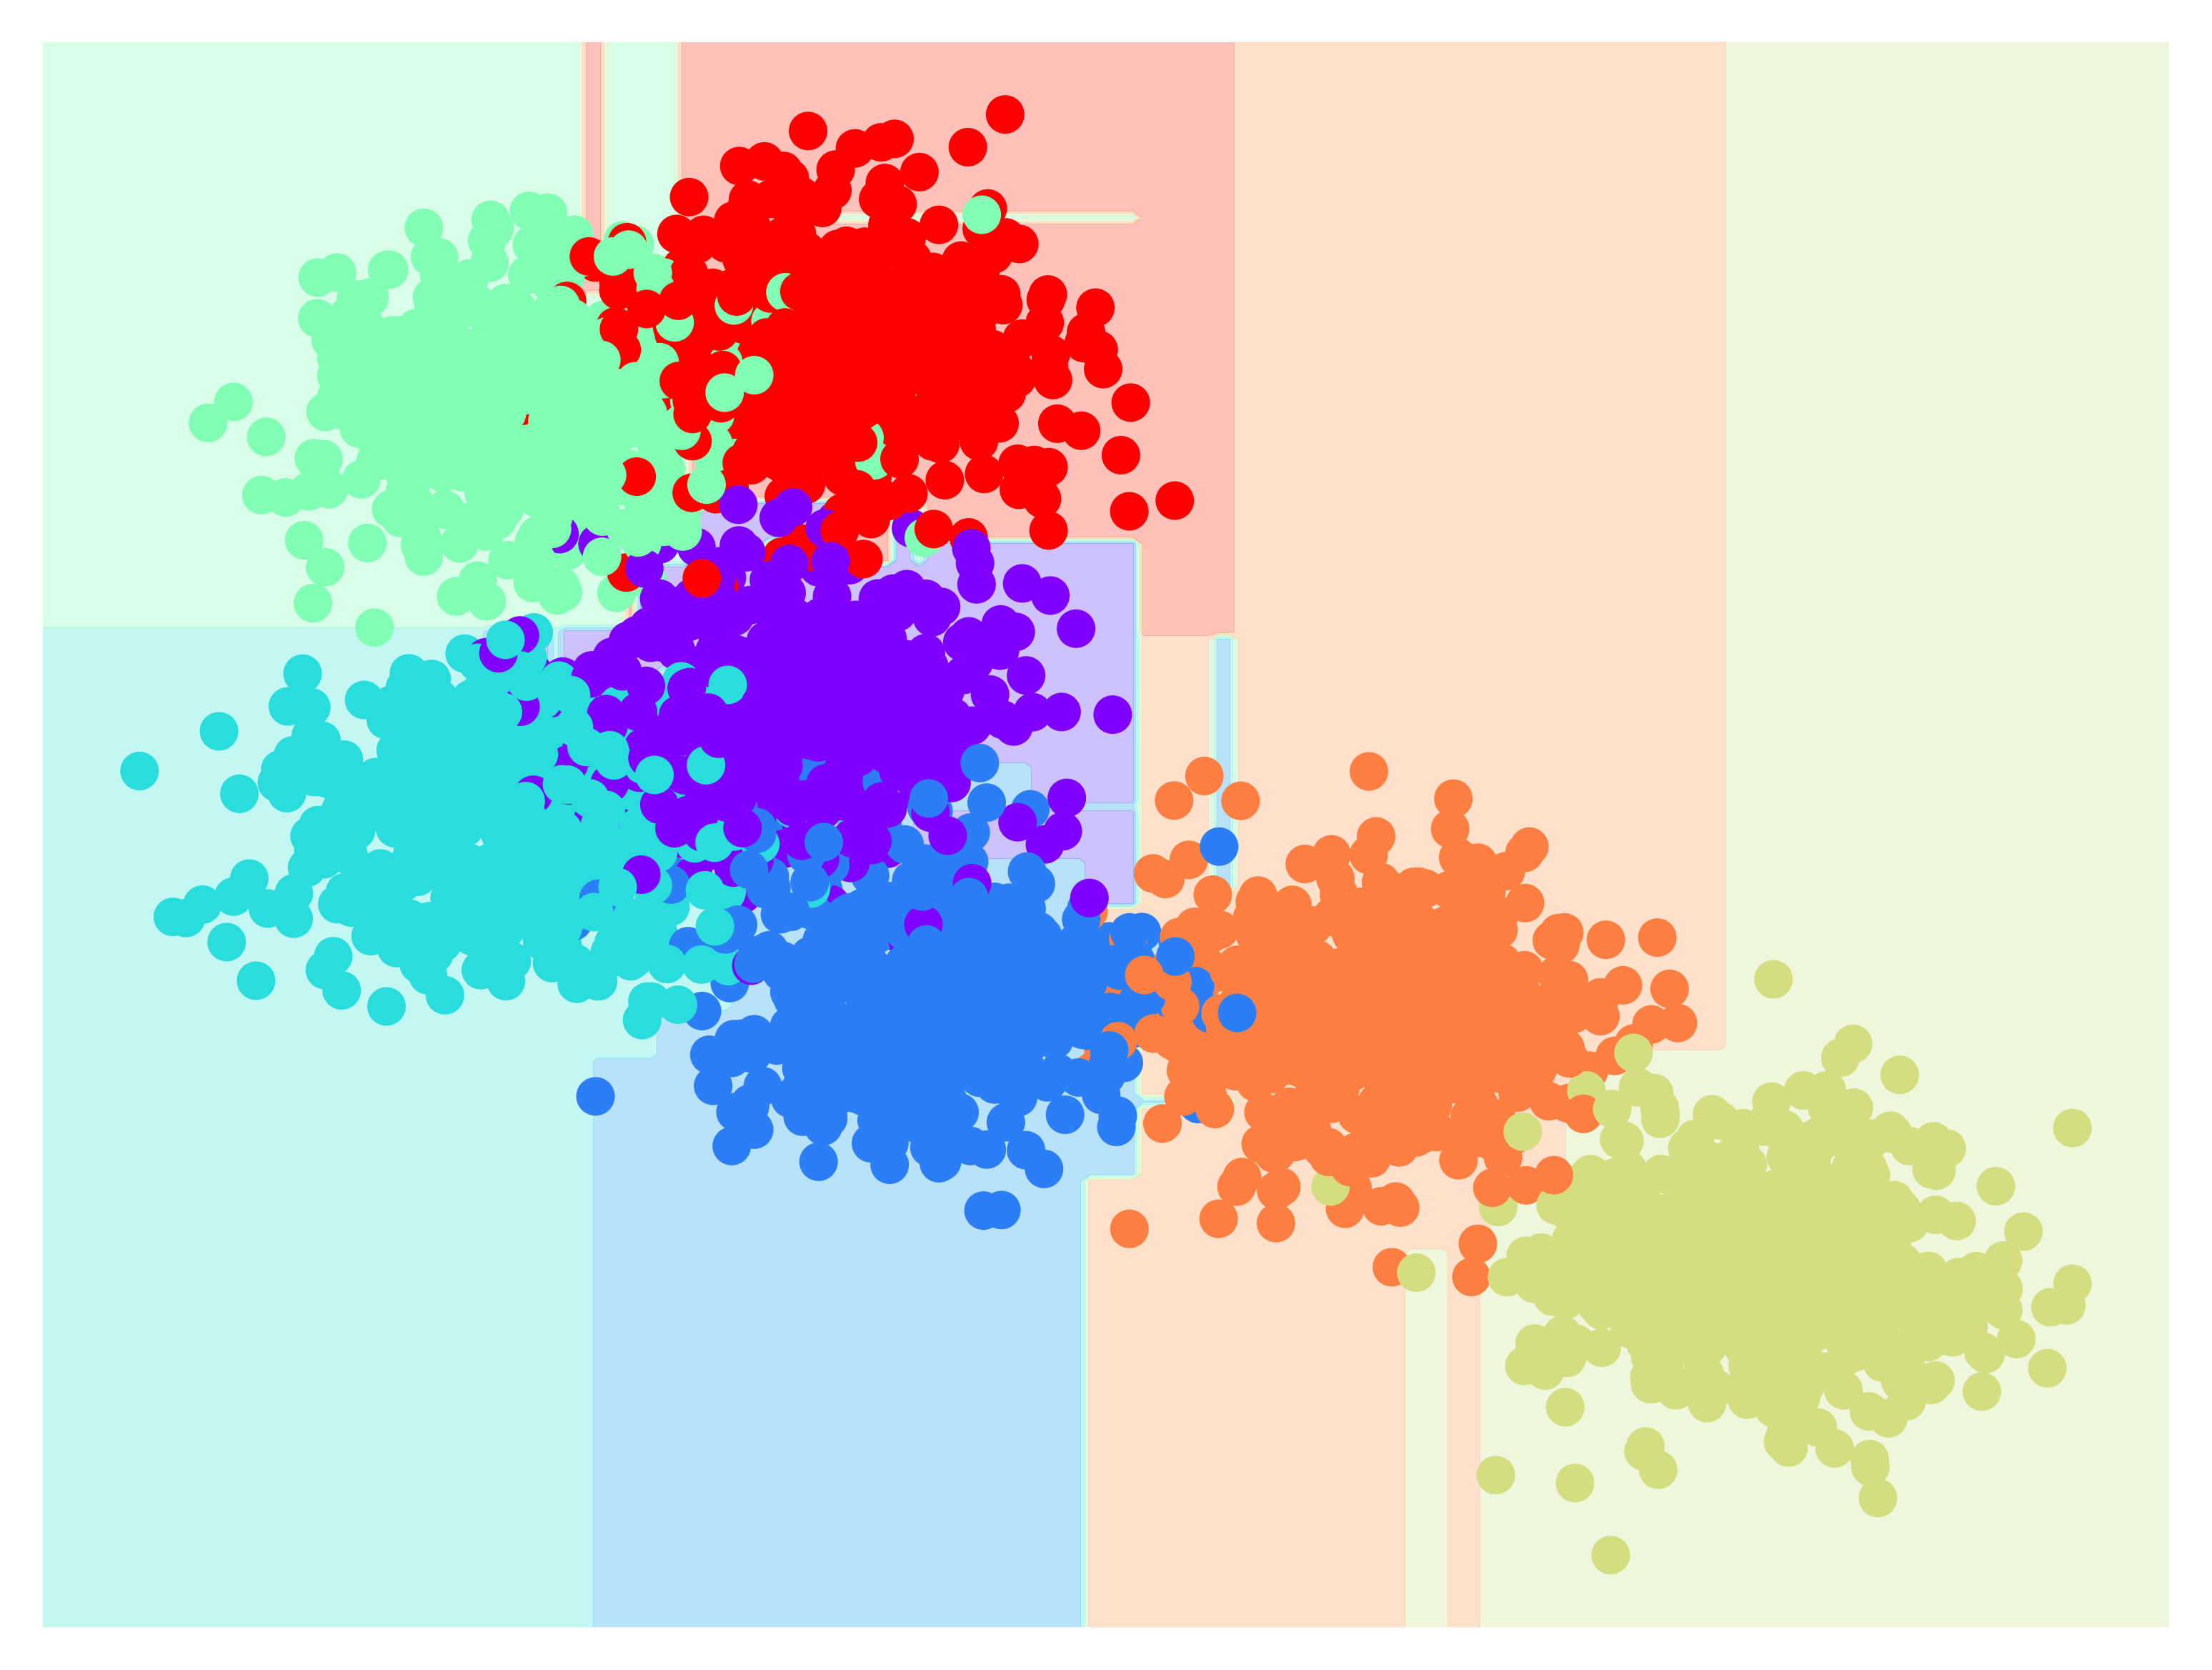

In [22]:
# Call the visualize_classifier function with the DecisionTreeClassifier model, input data X, and labels y
visualize_classifier(DecisionTreeClassifier(), X, y)

In [23]:
# helpers_05_08 is found in the online appendix
import helpers_05_08
# Call the plot_tree_interactive function with the input data X and labels y
helpers_05_08.plot_tree_interactive(X, y)

interactive(children=(IntSlider(value=5, description='depth', max=5, min=1), Output()), _dom_classes=('widget-…

<function helpers_05_08.plot_tree_interactive.<locals>.interactive_tree(depth=5)>

In [24]:
# helpers_05_08 is found in the online appendix
import helpers_05_08
# Call the randomized_tree_interactive function with the input data X and labels y
helpers_05_08.randomized_tree_interactive(X, y)

interactive(children=(IntSlider(value=0, description='random_state'), Output()), _dom_classes=('widget-interac…

C:\Users\Ben\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Ben\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


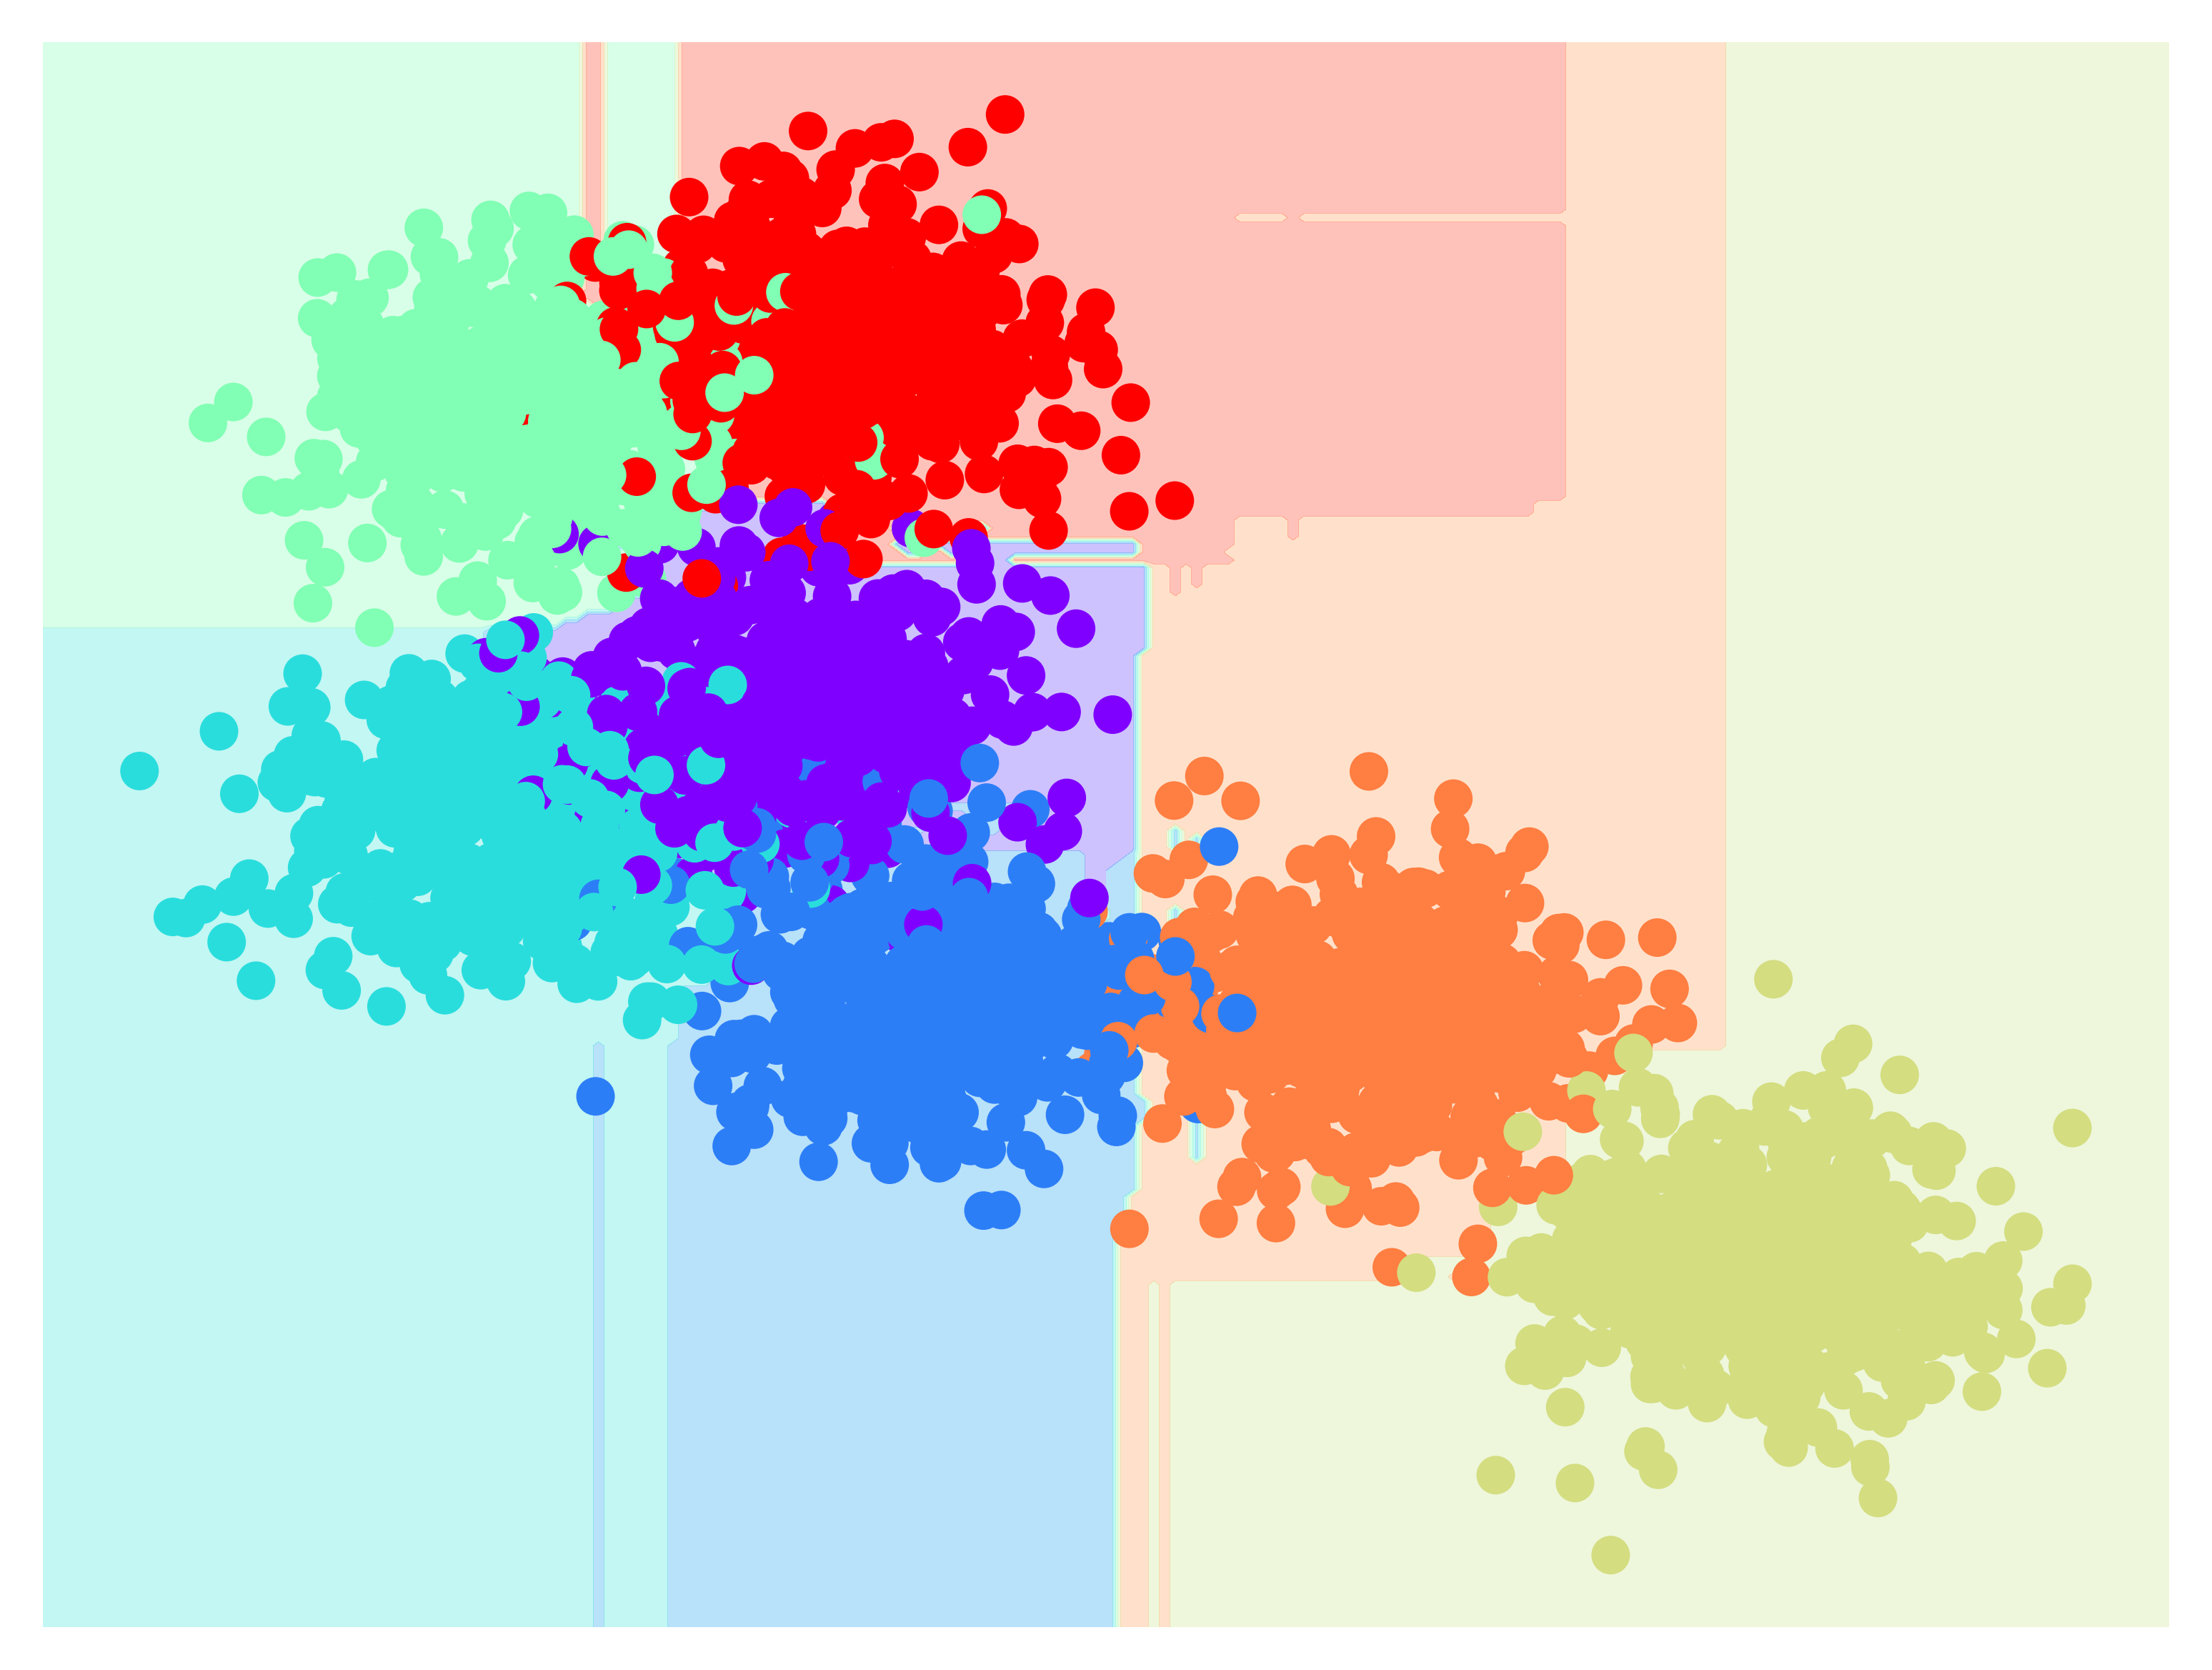

In [25]:
# Import necessary modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Create a Decision Tree Classifier
tree = DecisionTreeClassifier()

# Create a Bagging Classifier with 100 base estimators, using 80% of samples for each estimator
bag = BaggingClassifier(base_estimator=tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

# Fit the Bagging Classifier on the data (assuming X, y are defined earlier)
bag.fit(X, y)

# Visualize the Bagging Classifier
visualize_classifier(bag, X, y)

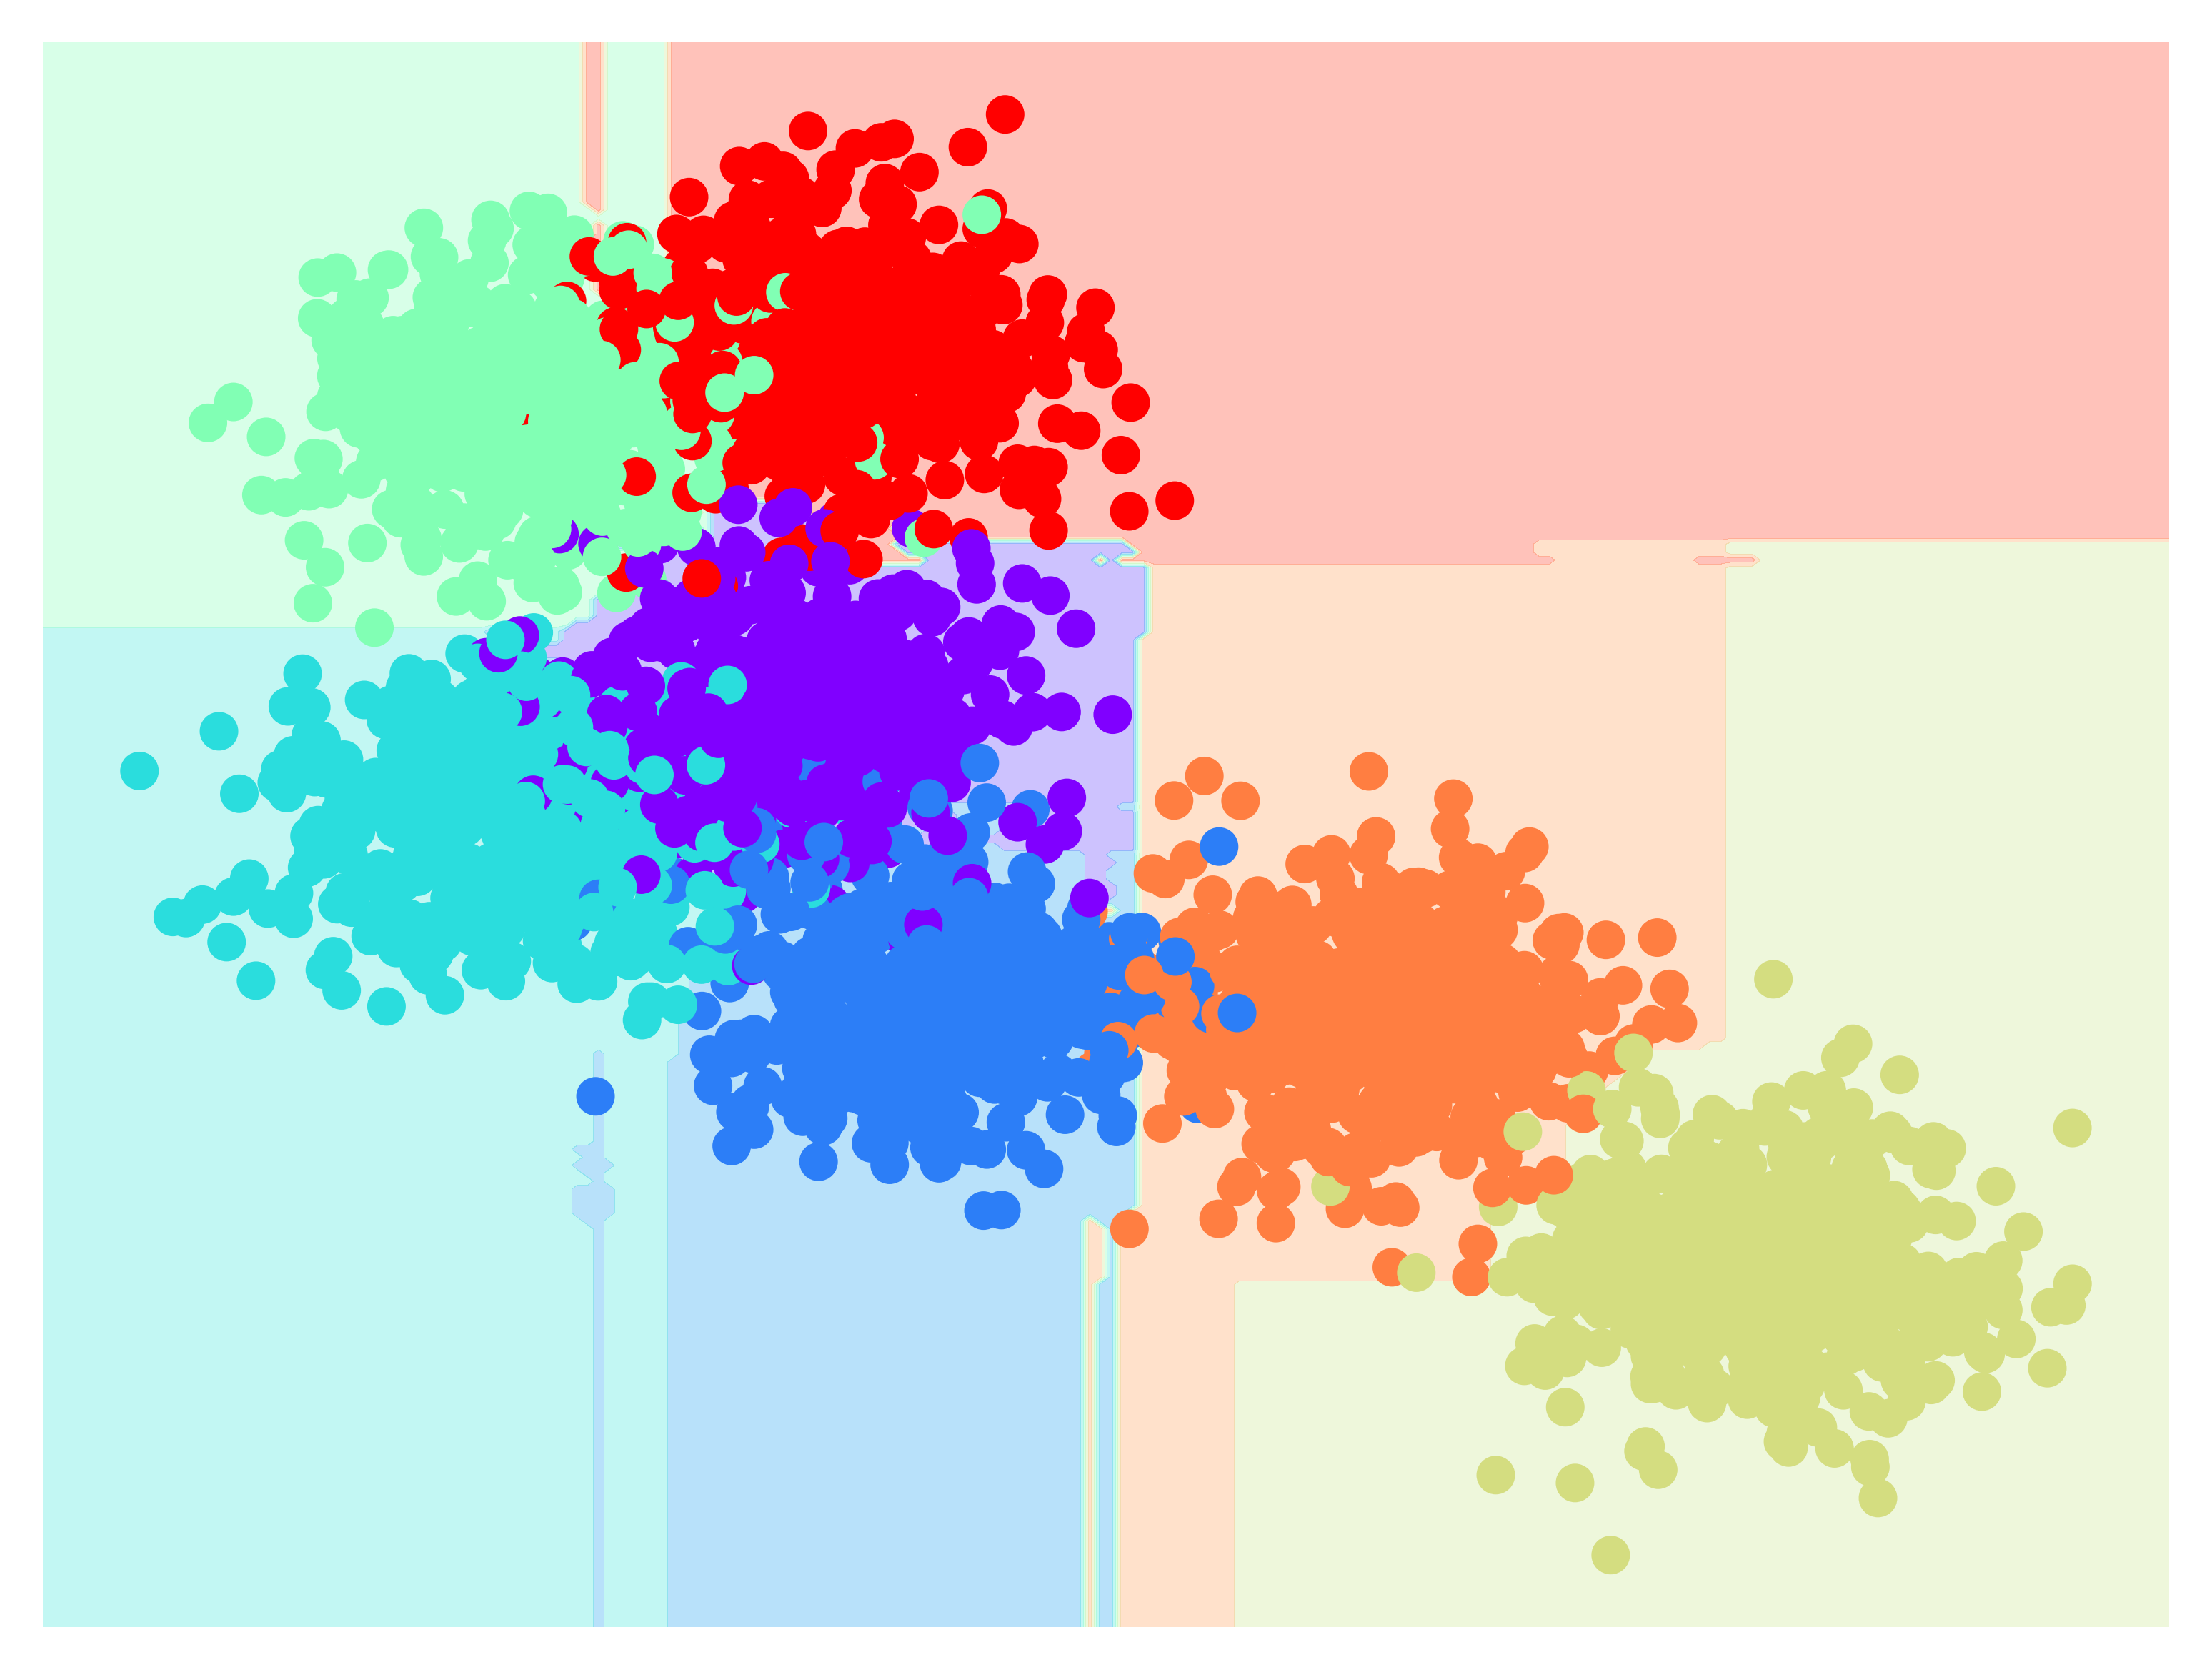

In [26]:
# Import necessary modules
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier with 100 trees
model = RandomForestClassifier(n_estimators=100, random_state=0)

# Visualize the RandomForestClassifier
visualize_classifier(model, X, y)

<ErrorbarContainer object of 3 artists>

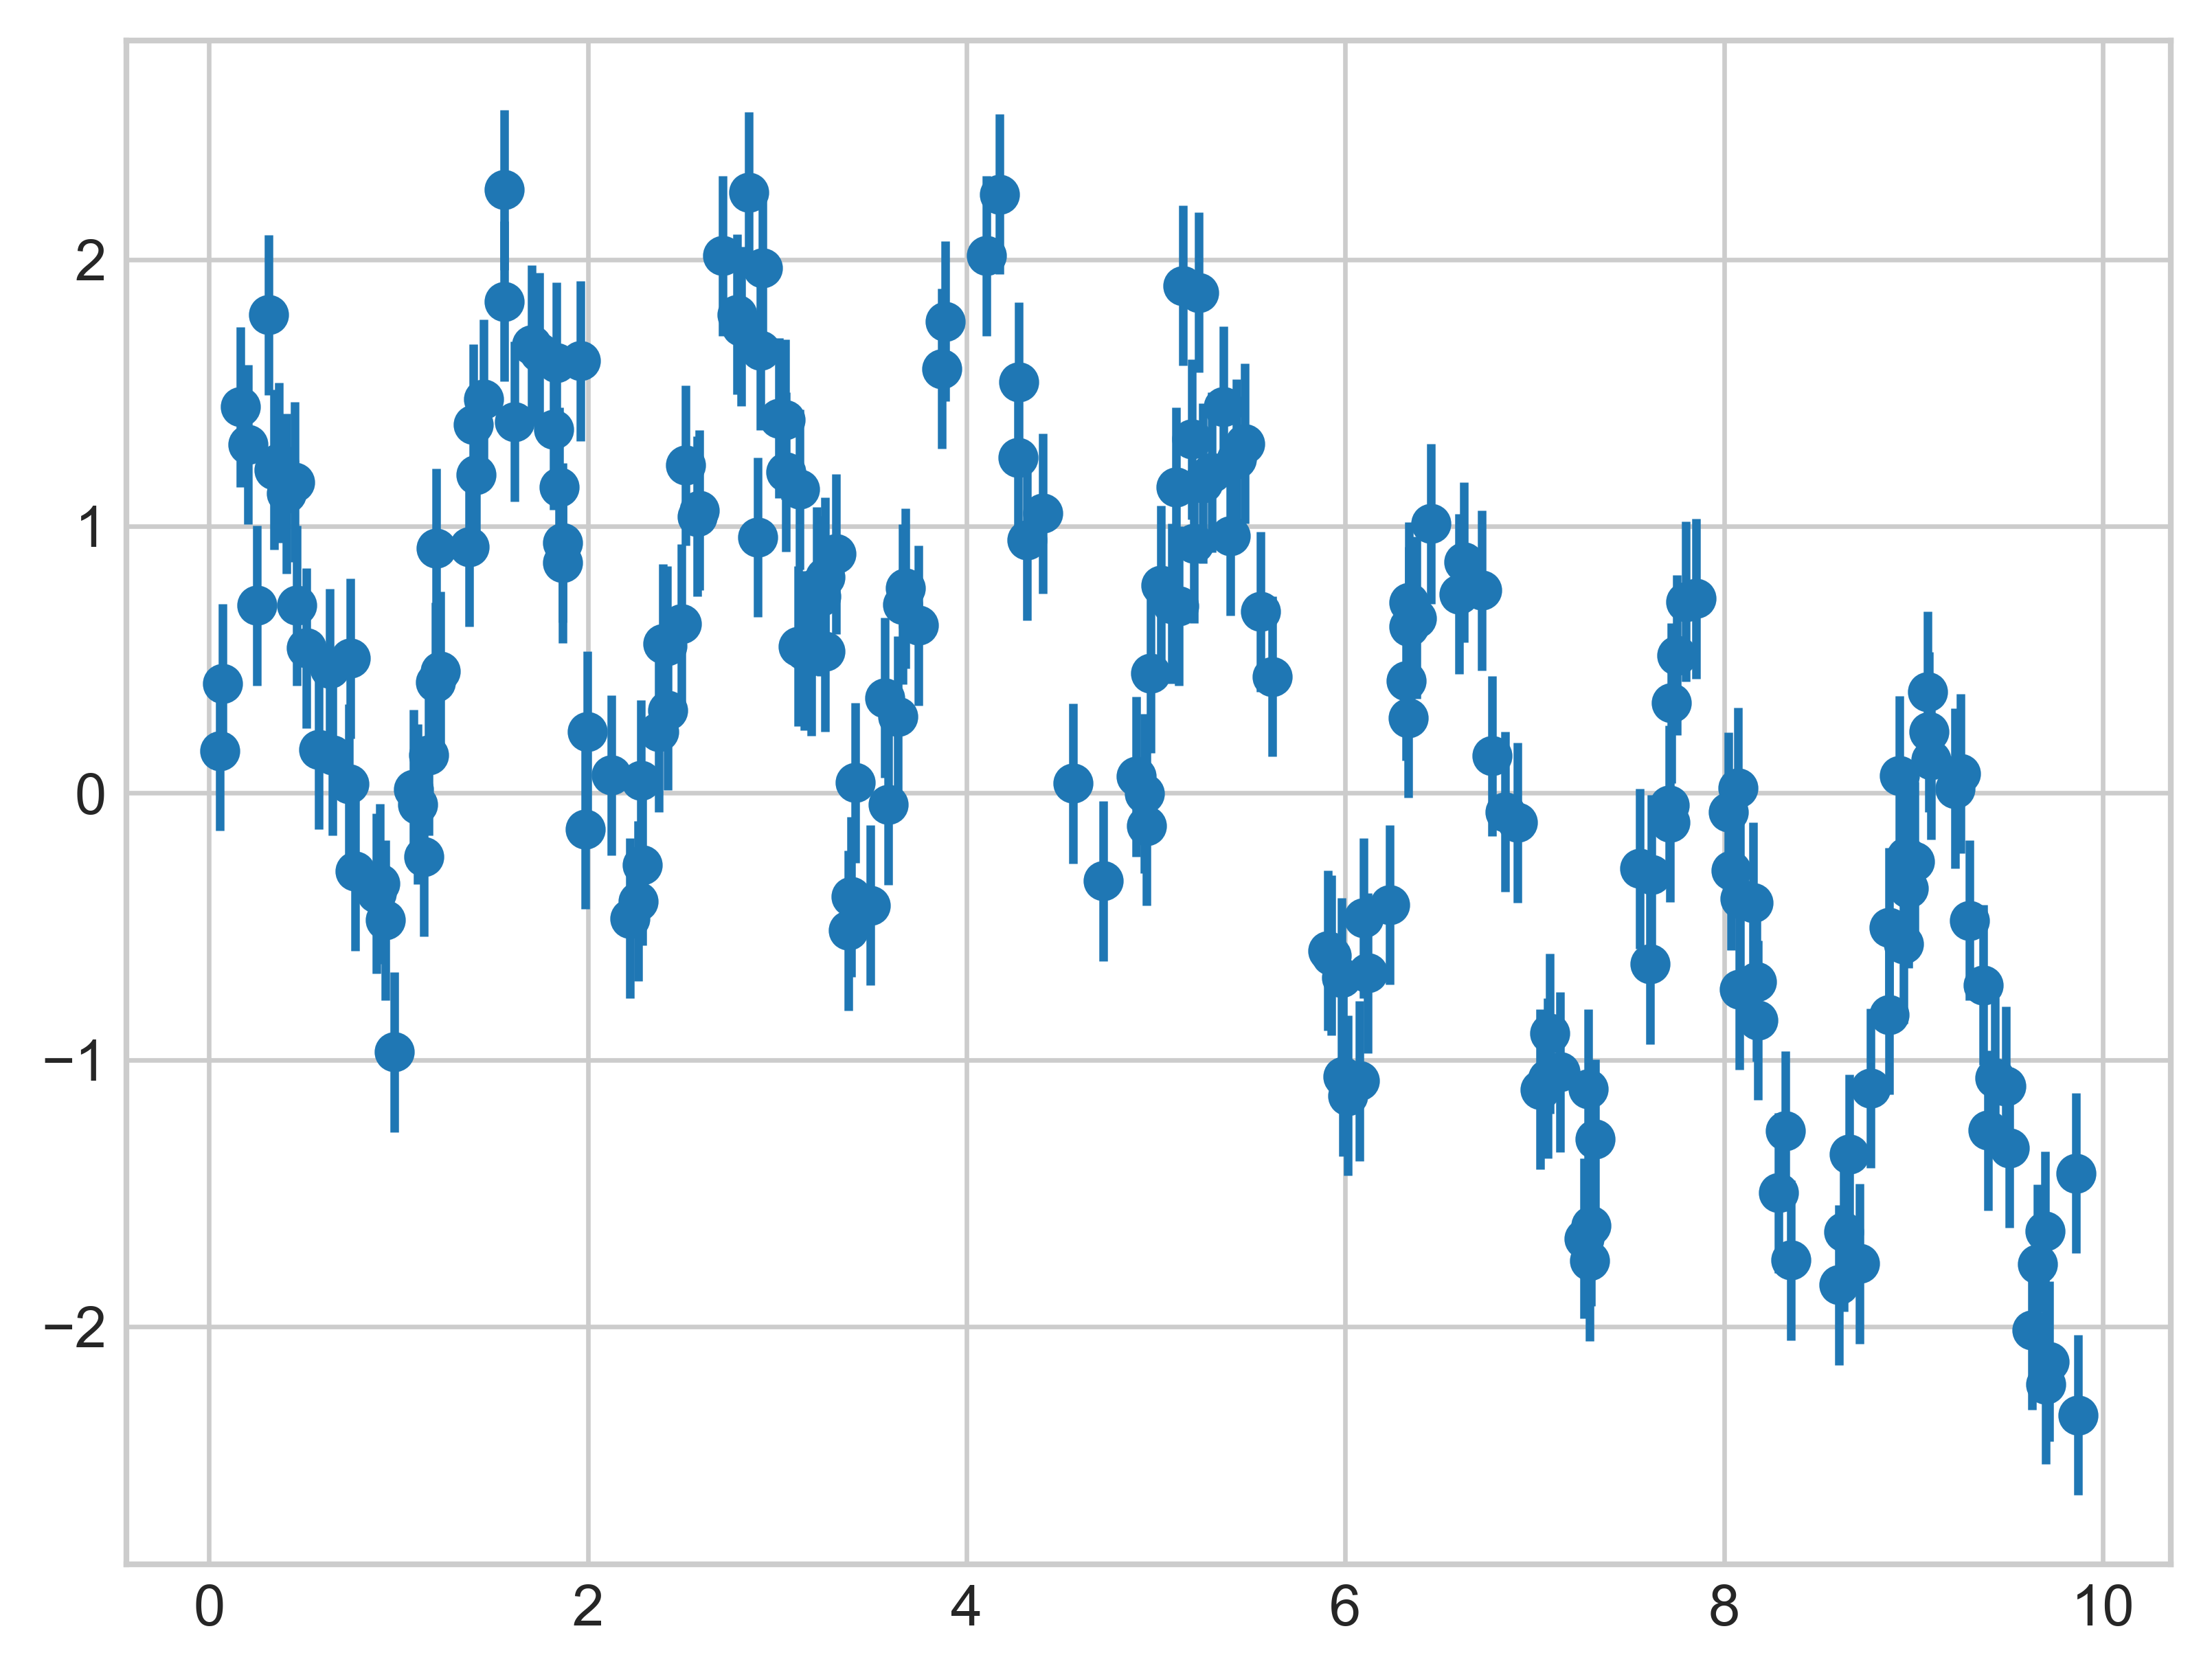

In [27]:
# Set random seed for reproducibility
rng = np.random.RandomState(42)

# Generate random data
x = 10 * rng.rand(200)

# Define a model function with oscillations and noise
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

# Generate y values using the model
y = model(x)

# Plot the data points with error bars
plt.errorbar(x, y, 0.3, fmt='o')

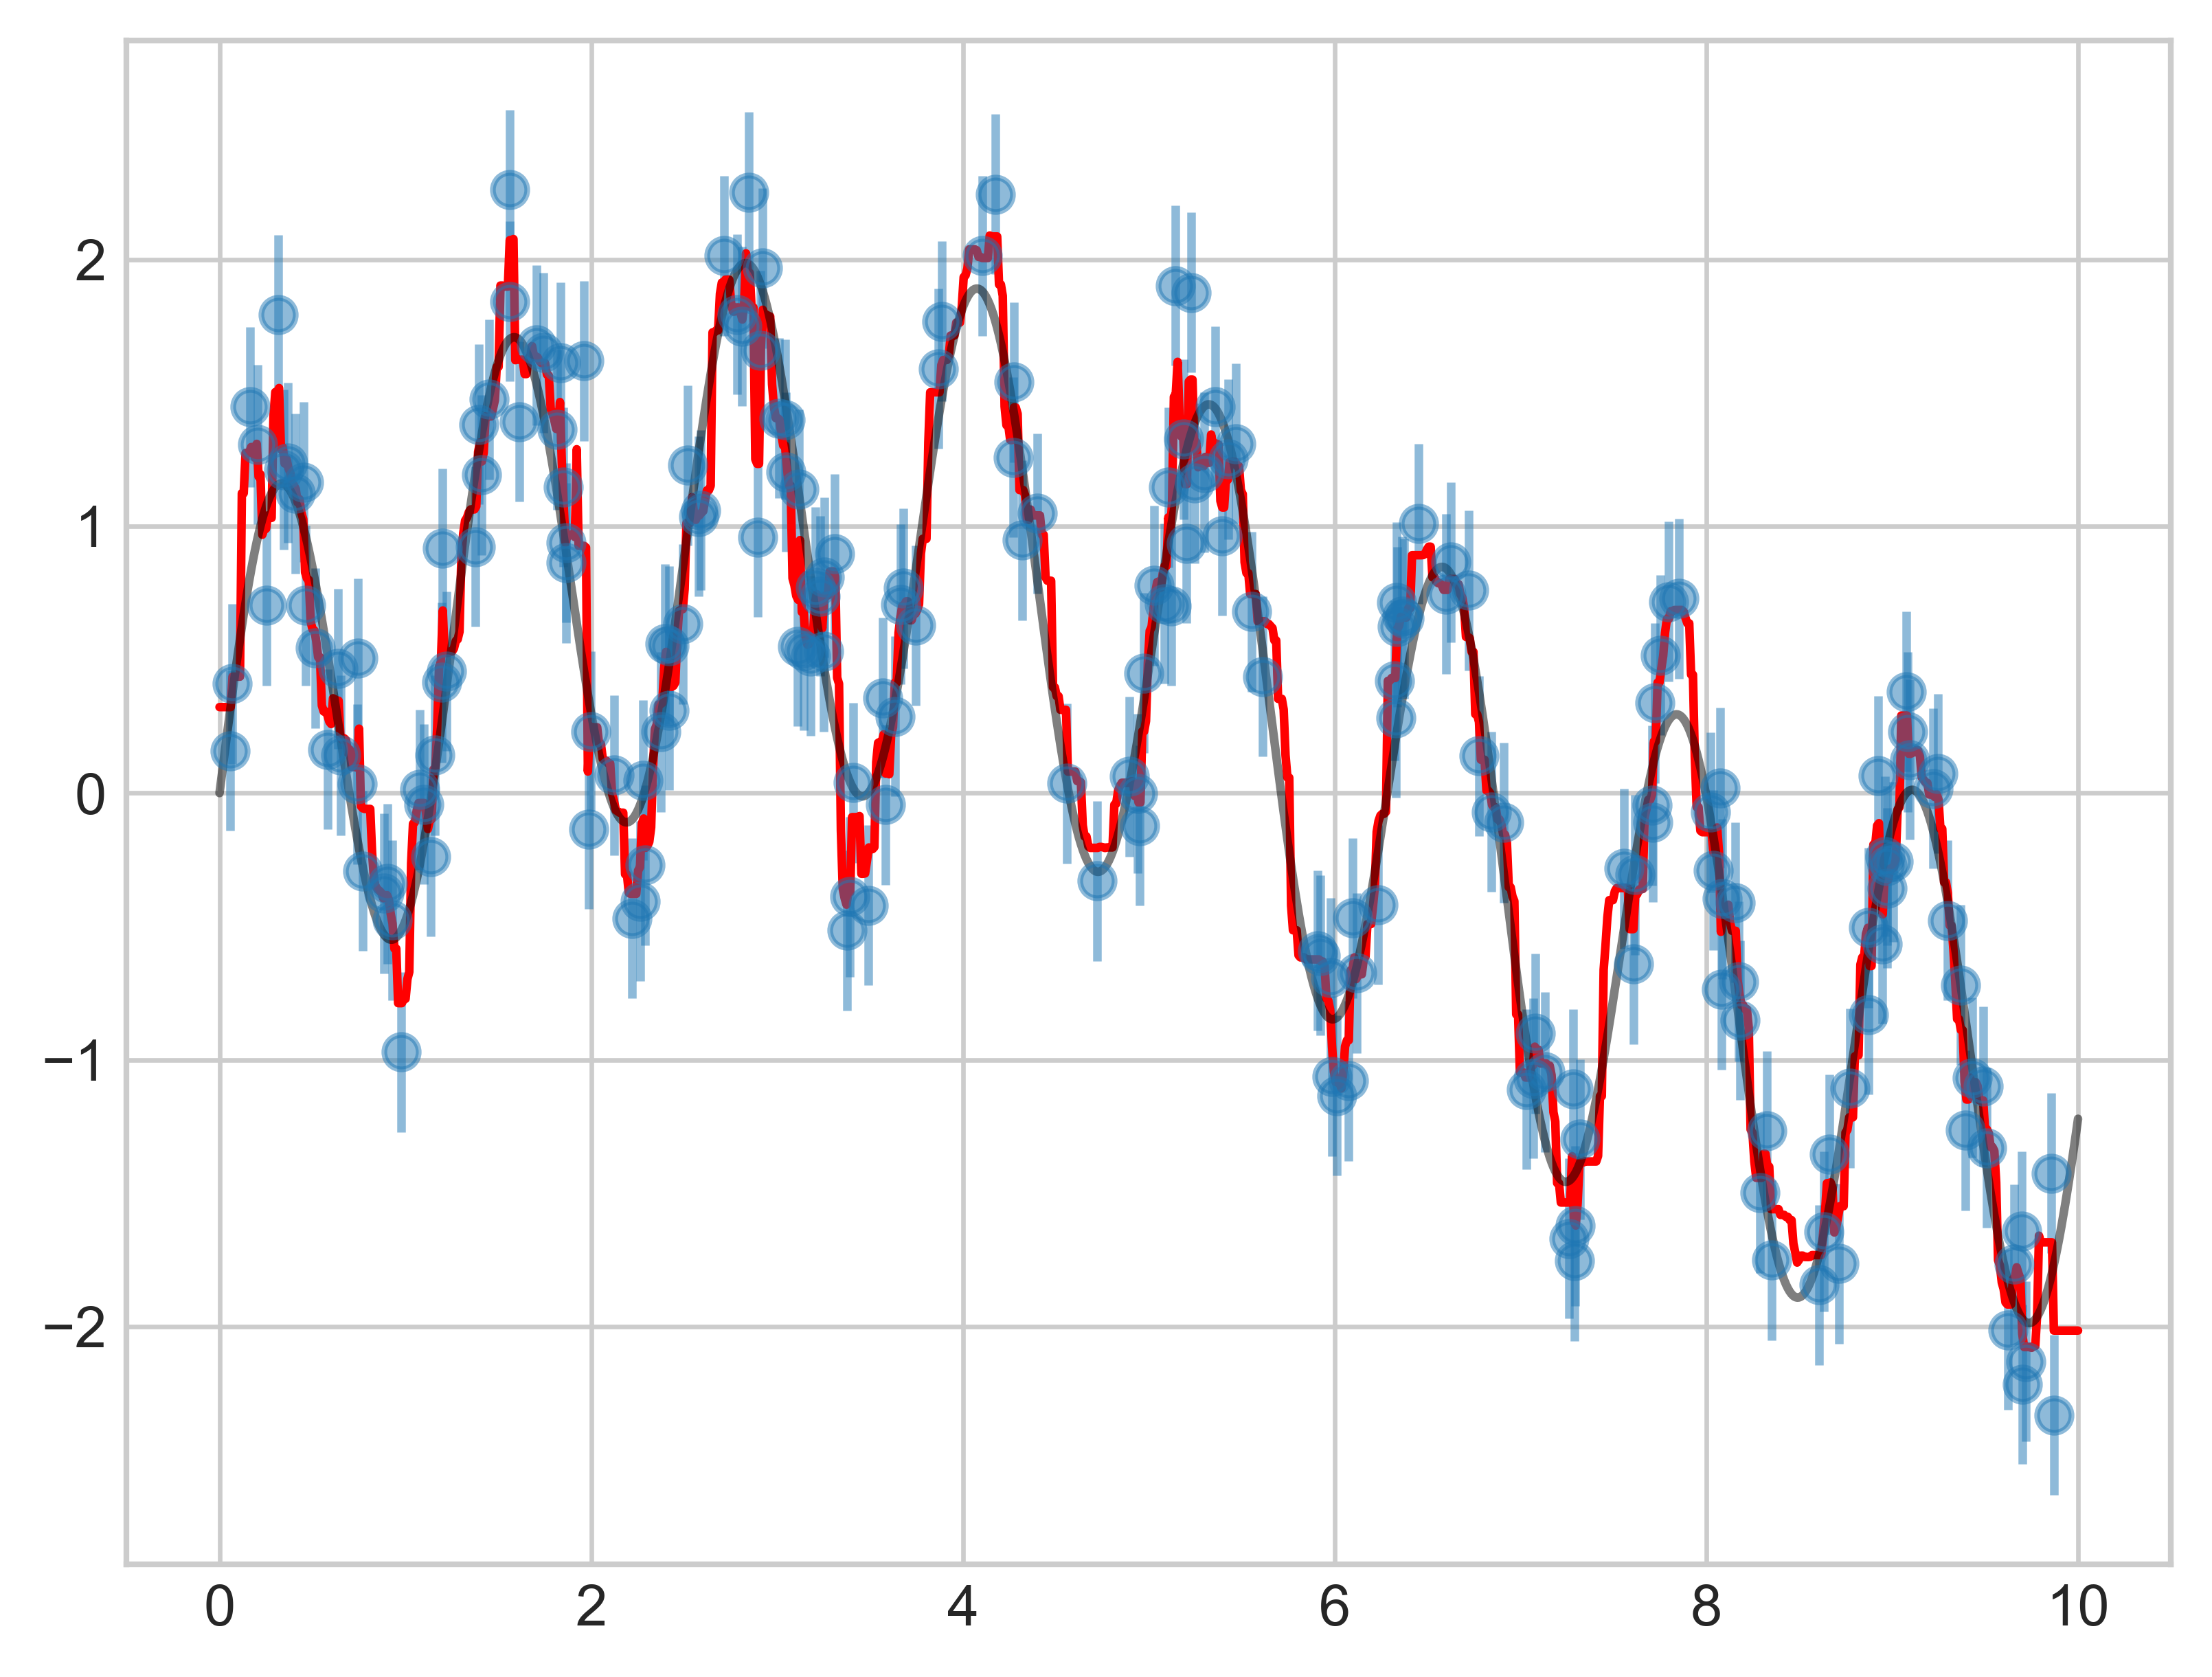

In [28]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# Create and fit a RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

# Generate x values for plotting
xfit = np.linspace(0, 10, 1000)

# Predict y values using the trained model
yfit = forest.predict(xfit[:, None])

# Generate true y values
ytrue = model(xfit, sigma=0)

# Plot the results
plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha=0.5)
plt.show()

In [29]:
# Import necessary libraries
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Print the keys of the dataset
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


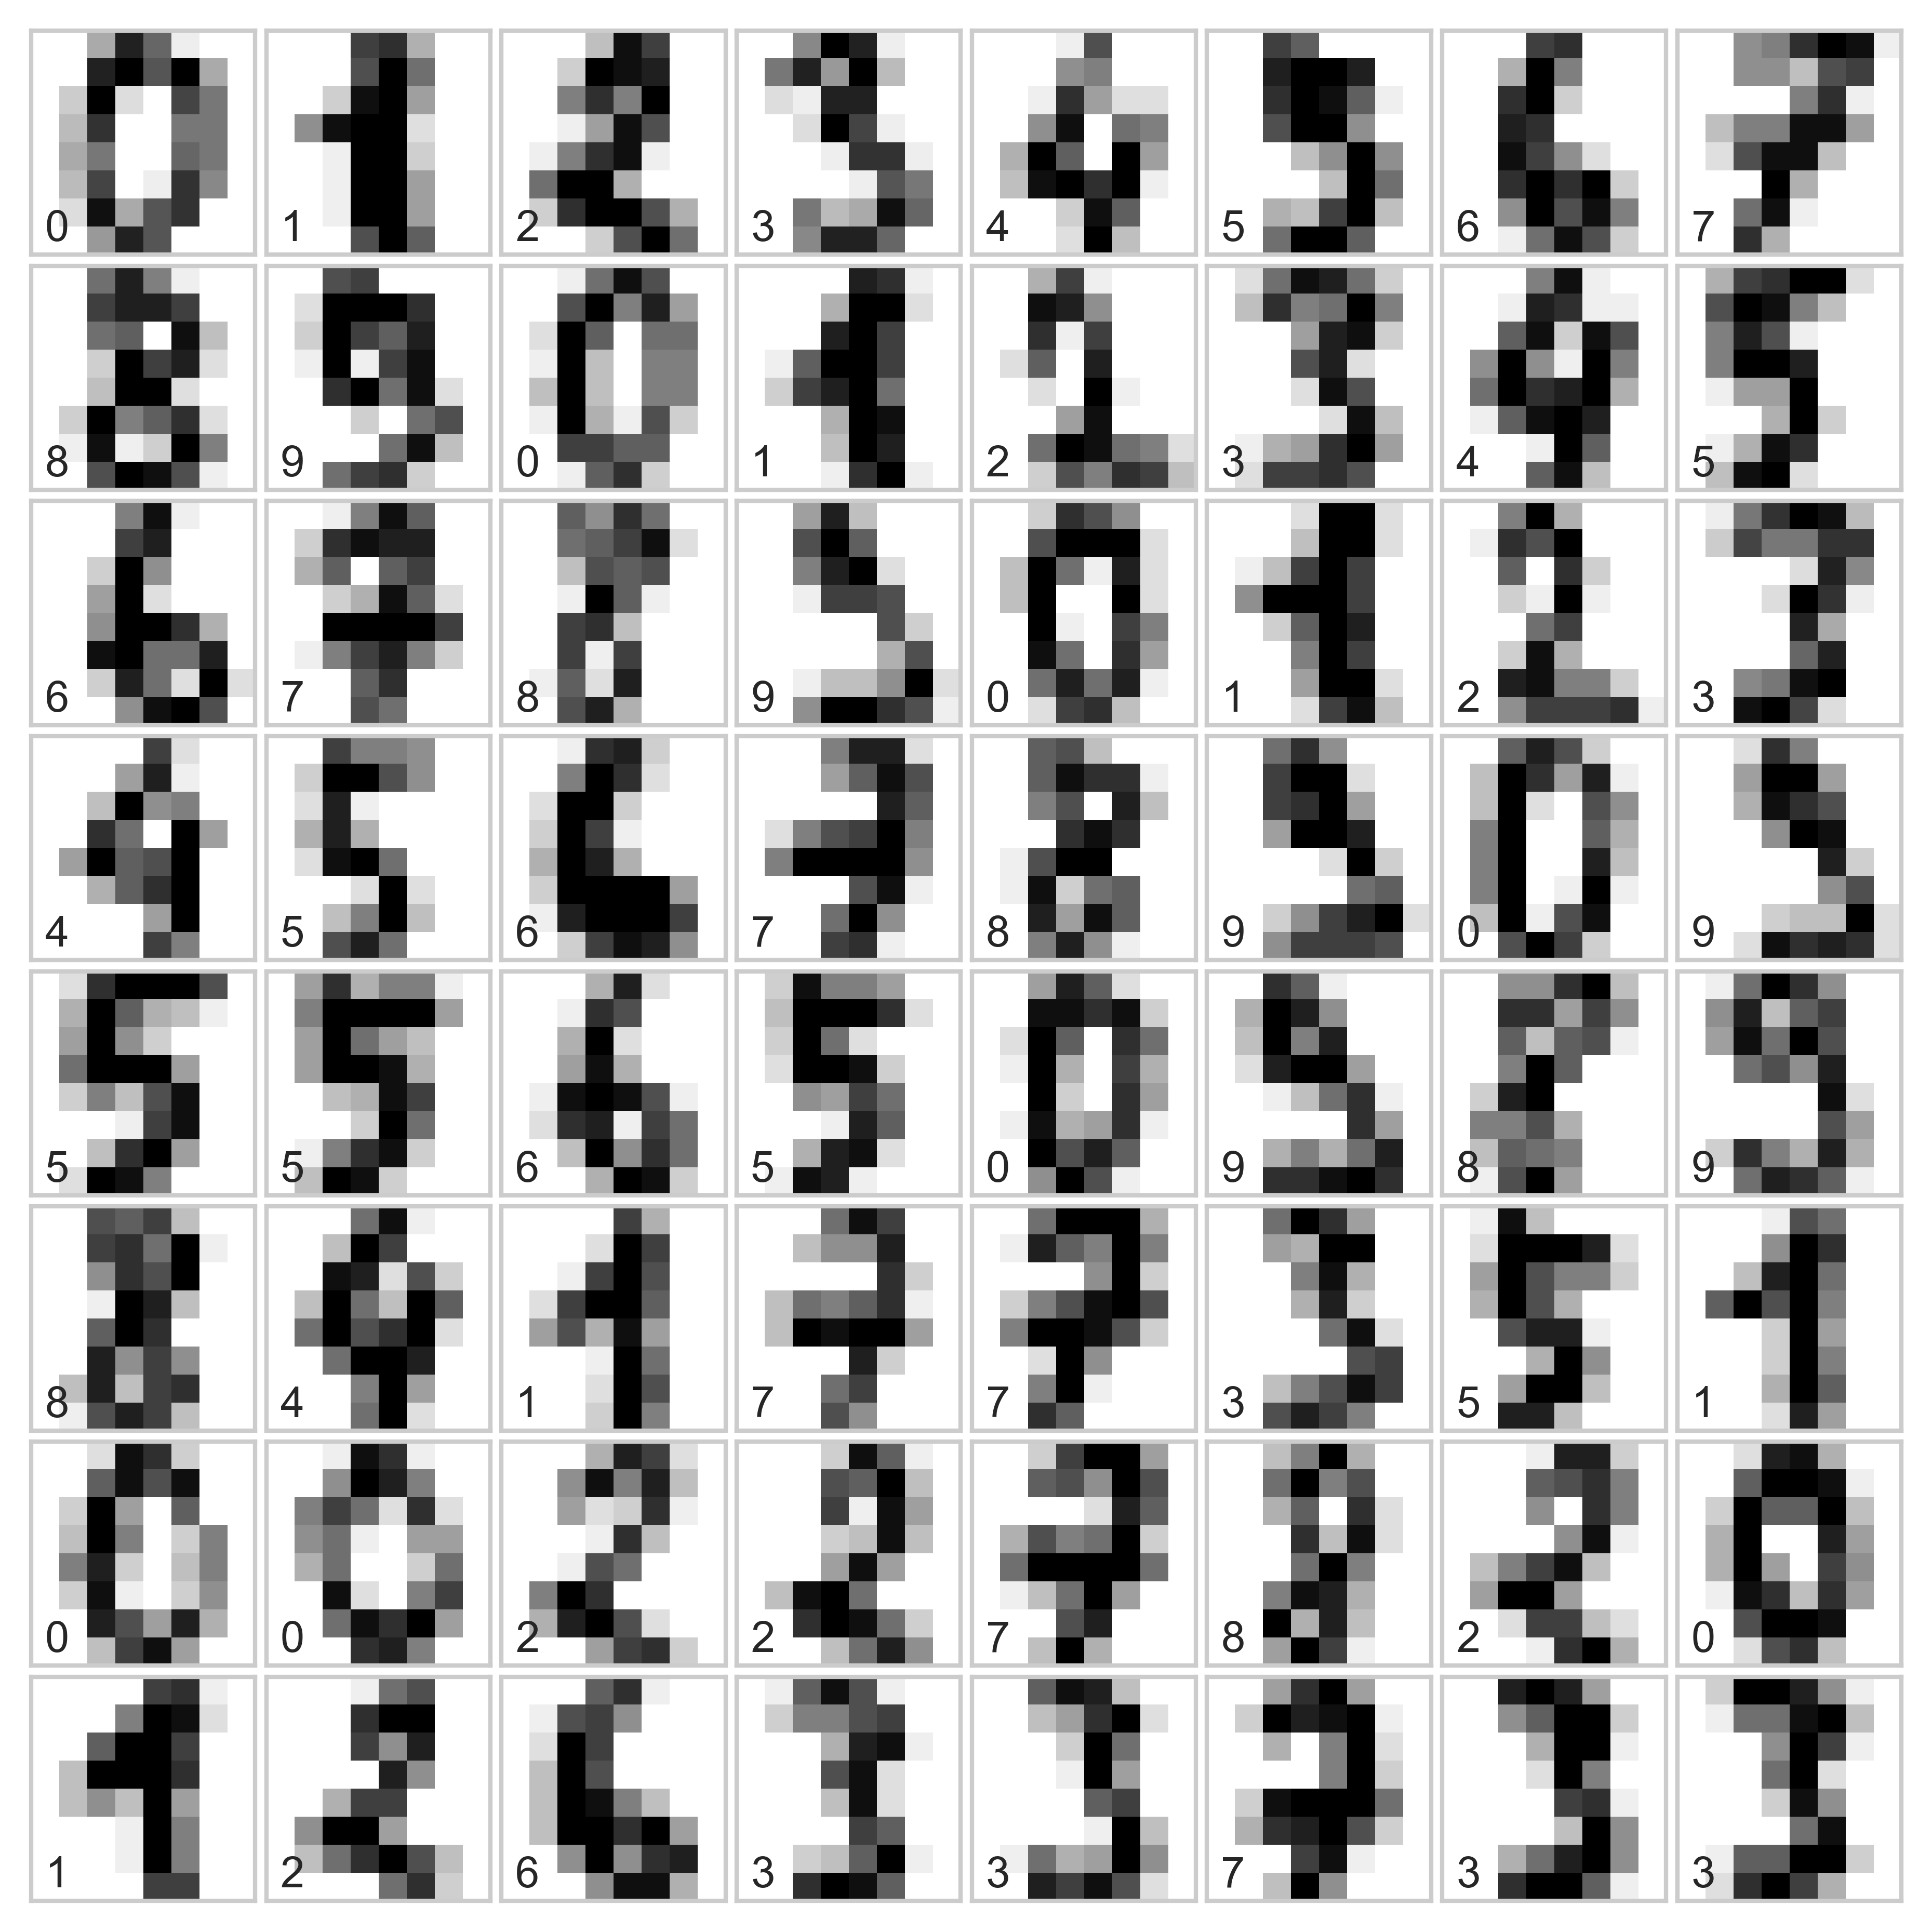

In [30]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [31]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)

# Create a RandomForestClassifier model with 1000 estimators
model = RandomForestClassifier(n_estimators=1000)

# Train the model on the training data
model.fit(Xtrain, ytrain)

# Make predictions on the test data
ypred = model.predict(Xtest)

In [32]:
# Import necessary libraries
from sklearn import metrics

# Print the classification report
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.96      0.98      0.97        47
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



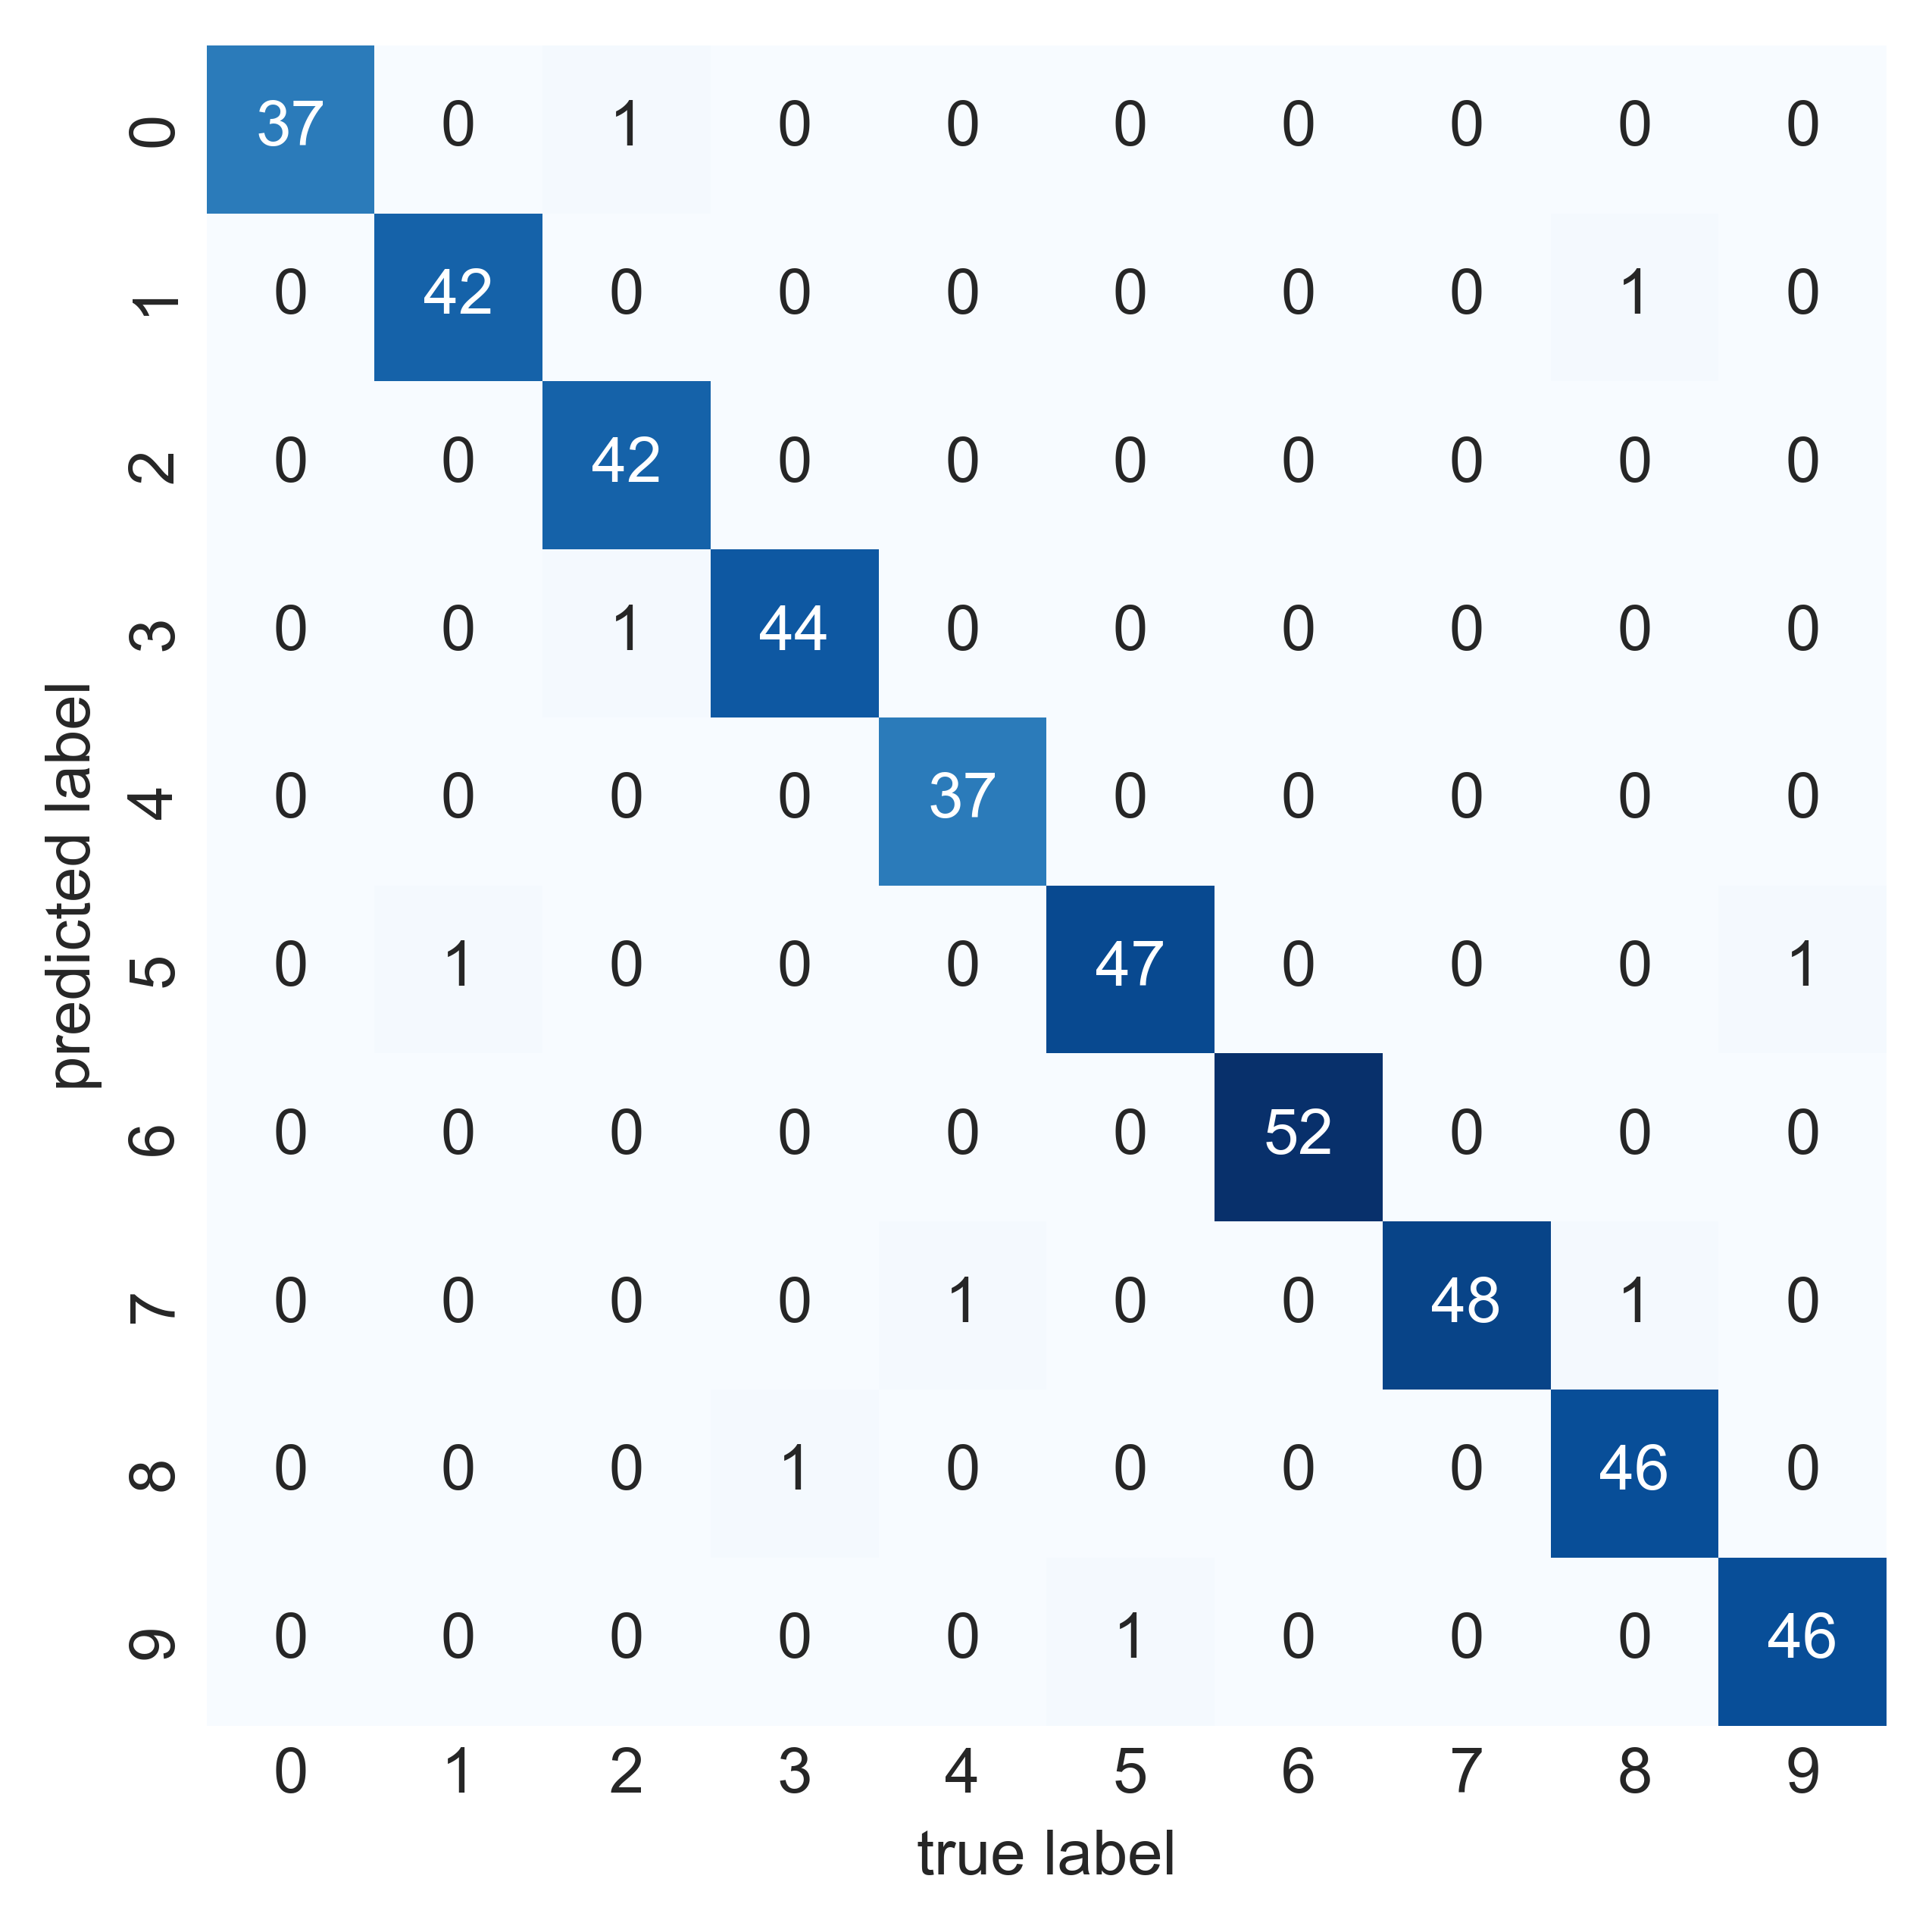

In [33]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
mat = confusion_matrix(ytest, ypred)

# Plot confusion matrix using seaborn heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues')

# Set axis labels
plt.xlabel('true label')
plt.ylabel('predicted label')

# Show the plot
plt.show()

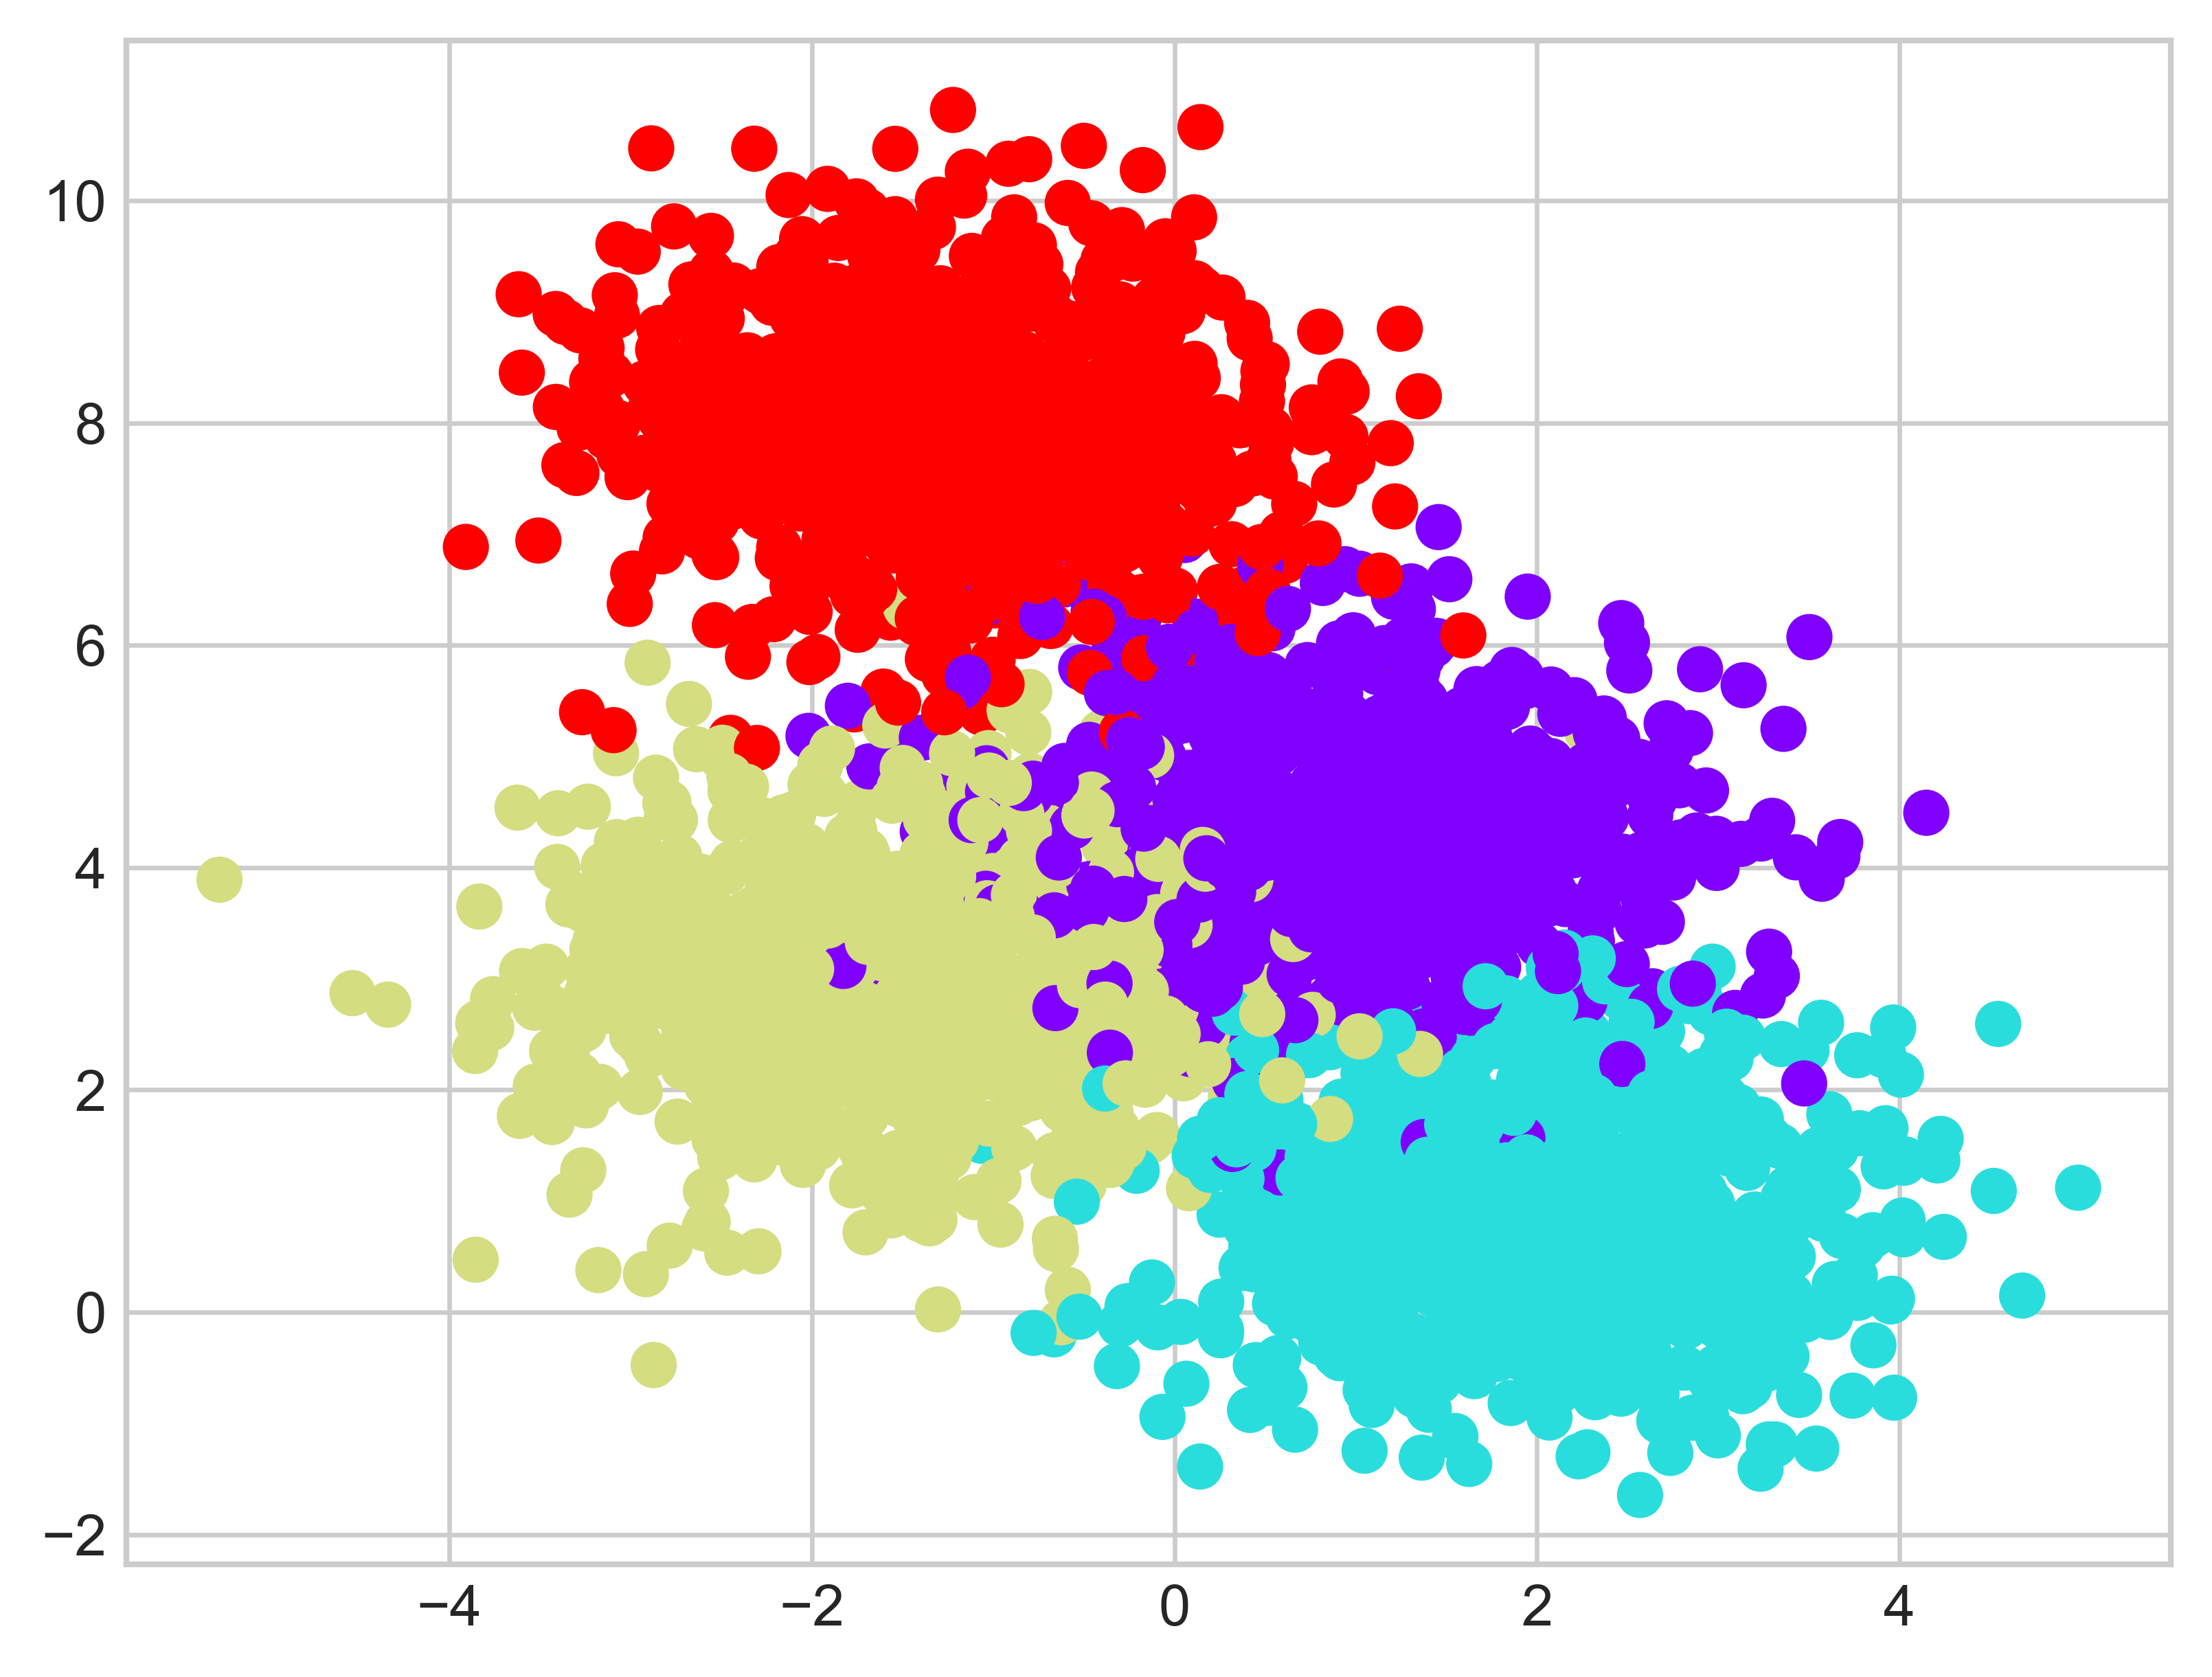

In [34]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate blobs data with 3000 samples, 4 centers, and a cluster standard deviation of 1.0
X, y = make_blobs(n_samples=3000, centers=4, random_state=0, cluster_std=1.0)

# Scatter plot of the generated data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

# Show the plot
plt.show()

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Load the dataset
data = pd.read_csv('ObesityDataSet.csv')  # Replace with your dataset



# Split the dataset into features (X) and target variable (y)
X = data.drop('FL_DATE', axis=1)
y = data['FL_DATE']


# Create Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
rf_classifier.fit(X_train, y_train)


# Evaluate model performance
y_pred = rf_classifier.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

ValueError: could not convert string to float: 'UA'

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Print the keys of the dataset
print(digits.keys())

In [ ]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)

# Create a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=1000)

# Train the model on the training data
model.fit(Xtrain, ytrain)

# Make predictions on the testing data
ypred = model.predict(Xtest)

In [ ]:
# Import necessary libraries
from sklearn import metrics

# Print the classification report
print(metrics.classification_report(ypred, ytest))

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
mat = confusion_matrix(ytest, ypred)

# Plot heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues')

# Set axis labels
plt.xlabel('true label')
plt.ylabel('predicted label')

# Show the plot
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Create synthetic data using make_blobs
X, y = make_blobs(n_samples=3000, centers=4,
                  random_state=0, cluster_std=1.0)

# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('ObesityDataSet.csv')  # Replace with your dataset

# Split the dataset into features (X) and target variable (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Create Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
rf_classifier.fit(X_train, y_train)

# Evaluate model performance
y_pred = rf_classifier.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()